<a href="https://colab.research.google.com/github/nbasaranakgul/airlinereport/blob/main/Combined_files_Yourtube_text_data_anal_aafile1_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Setting Up the Environment

Install essential packages

In [ ]:
pip install pandas numpy matplotlib seaborn

In [ ]:
pip install pandas nltk gensim sklearn wordcloud matplotlib


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora, models

In [ ]:
# This code copied and can be deleted
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora, models


Load the Dataset

Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Access your file using the mounted drive:
file_path = '/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv'
# Now you can use file_path to read the data with pandas or other methods

Mounted at /content/drive


In [ ]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading the Data
Load each CSV file into a separate DataFrame or loop through the files to load them all into a list.

---



In [ ]:
# Read the dataset
#path = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2019_Toxics_Exposure_Concentrations.csv')
path = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

# Create the Dataframe
#DataFrameName = pd.DataFrame(path)
Youtube_transcript = pd.DataFrame(path)


In [ ]:
# note no  need to write all paths use * import pandas as pd
import glob

# Load all CSV files  THIS ONE IS A BETTER CODE
# Path where the CSV files are stored (update this to your directory)
path = "/content/drive/MyDrive/Arif_Youtube_Text"

# Use glob to find all CSV files in the folder
all_YTfiles = glob.glob("/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript10.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript11.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript12.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript13.csv",
                       "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript14.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript15.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript16.csv",
                        "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript17.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript18.csv",
                        "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript19.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript2.csv",
                        "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript20.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript3.csv",
                        "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript4.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript5.csv",
                        "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript6.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript7.csv",
                        "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript8.csv", "/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript9.csv")

# Load each CSV file and combine them into one DataFrame
YTfiles_list = [pd.read_csv(file) for file in all_YTfiles]
combined_YTfiles = pd.concat(YTfiles_list, ignore_index=True)

# Display the combined DataFrame
print(combined_YTfiles.head())


TypeError: glob() takes 1 positional argument but 20 were given

In [ ]:
import pandas as pd
import glob

# Load all CSV files  THIS ONE IS A BETTER CODE
# Path where the CSV files are stored (update this to your directory)
path = "/content/drive/MyDrive/Arif_Youtube_Text"

# Use glob to find all CSV files in the folder with a wildcard pattern
all_YTfiles = glob.glob(path + "/youtubetranscript*.csv")

# Load each CSV file and combine them into one DataFrame
YTfiles_list = [pd.read_csv(file) for file in all_YTfiles]
combined_YTfiles = pd.concat(YTfiles_list, ignore_index=True)

# Display the combined DataFrame
print(combined_YTfiles.head())

                                          Transcript
0  Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...
1  [['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...
2  Transcripts\n10-Paraguay, principal productor ...
3  [['Transcripts'], ['10-Paraguay, the main prod...
4  Transcripts\n13-Informe Especial: La ruta de l...


Load each text file into a DataFrame or a list for easier processing.

In [ ]:
#another WAy to read the data
import glob

all_YTfiles = glob.glob("/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv")
texts = [open(file, 'r').read() for file in file_paths]

# Create a DataFrame to hold the data
df = pd.DataFrame({'text': texts})


# Step 3: Exploring and Cleaning Data

Loop through each DataFrame to inspect column names, missing values, and data types.

In [ ]:
combined_YTfiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Transcript  39 non-null     object
dtypes: object(1)
memory usage: 440.0+ bytes


In [ ]:
#not icluded for i, Youtube_transcript in enumerate(Youtube_transcript):
    # not included print(f"youtube_transcript {i+1}")

print(combined_YTfiles.info())
print(combined_YTfiles.describe())
print(combined_YTfiles.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Transcript  39 non-null     object
dtypes: object(1)
memory usage: 440.0+ bytes
None
                                               Transcript
count                                                  39
unique                                                 39
top     Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...
freq                                                    1
Transcript    0
dtype: int64


In [ ]:
combined_YTfiles.shape

(39, 1)

In [ ]:
print(combined_YTfiles.columns) # here is the all column that we have

Index(['Transcript'], dtype='object')


In [ ]:
print(combined_YTfiles.dtypes)

Transcript    object
dtype: object


In [ ]:
combined_YTfiles.isnull().any()


,0
Transcript,False


Prepare the text by removing unnecessary characters, converting to lowercase, removing stopwords, and tokenizing.

In [ ]:
!pip install nltk

import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean and preprocess each text
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic words
    words = [word for word in words if word.isalpha() and word not in stopwords.words('english')]
    return words

# Assuming your transcript column is named 'Transcript'
# Rename the column to 'text' for consistency with your preprocessing function
combined_YTfiles.rename(columns={'Transcript': 'text'}, inplace=True)

# Apply preprocessing to each transcript
combined_YTfiles['processed_text'] = combined_YTfiles['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Step 4: Data Cleaning and Transformation
Python:
Common cleaning steps include handling missing values, standardizing columns, and data type conversions.

# Exploratory Data Analysis (EDA)


In [ ]:
combined_YTfiles.describe()

,text,processed_text
count,39,39
unique,39,39
top,Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...,"[transcripts, en, paraguay, rcn, tv, https, tr..."
freq,1,1


In [ ]:
for i, Youtube_transcript in enumerate(dfs):
    # Example: Fill missing values with the mean of each column
    combined_YTfilest.fillna(df.mean(), inplace=True)
    # Standardize column names
    Youtube_transcript.columns = [col.lower().replace(" ", "_") for col in df.columns]


# Step 5: Merging or Concatenating Data (if needed)
Concatenate all DataFrames if data needs to be combined.

In [ ]:
combined_youtube = pd.concat(dfs, ignore_index=True)

#already done!! no need


#Step 6: Data Analysis
Descriptive Statistics: Calculate mean, median, mode, variance, etc.
Exploratory Data Analysis (EDA): Use visualizations to explore distributions and relationships. New Section

In [ ]:
# Descriptive statistics
print(combined_YTfiles.describe())

# Visualization
# Access the transcript column using the standardized name, likely 'transcripts'
# sns.histplot(combined_YTfiles['Transcripts'], kde=True)  # Original line causing error
sns.histplot(combined_YTfiles['text'], kde=True)  # Changed to 'text' which might be correct column
plt.show()

                                                     text  \
count                                                  39   
unique                                                 39   
top     Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...   
freq                                                    1   

                                           processed_text  
count                                                  39  
unique                                                 39  
top     [transcripts, en, paraguay, rcn, tv, https, tr...  
freq                                                    1  


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 640x480 with 1 Axes>

                                                     text  \
count                                                  39   
unique                                                 39   
top     Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...   
freq                                                    1   

                                           processed_text  
count                                                  39  
unique                                                 39  
top     [transcripts, en, paraguay, rcn, tv, https, tr...  
freq                                                    1  


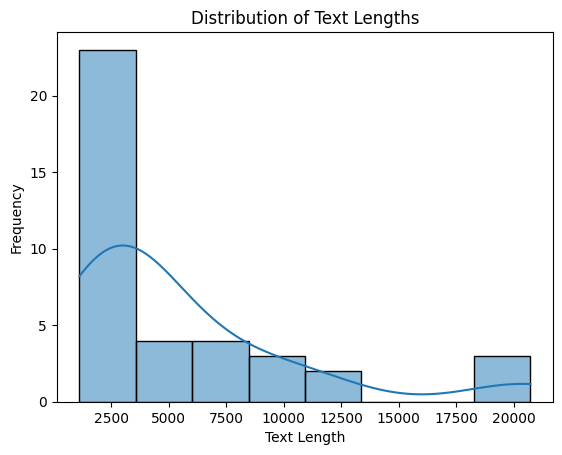

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'combined_YTfiles' is your DataFrame

# Descriptive statistics
print(combined_YTfiles.describe())

# Visualization (Modified)

# Instead of using histplot, consider visualizing text length distribution:
combined_YTfiles['text_length'] = combined_YTfiles['text'].apply(len)
sns.histplot(combined_YTfiles['text_length'], kde=True)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

# Or, if you want to explore word frequencies, consider using a word cloud:
# (requires additional libraries like wordcloud and nltk)
# ...

In [ ]:
# ipython-input-0-5464c97bb516
import pandas as pd

# Assuming 'dfs' is a list of DataFrames
combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
# ipython-input-42-5464c97bb516
# Assuming 'df' is a pre-existing DataFrame with column names and data types as reference

for i, Youtube_transcript in enumerate(dfs):
    # Example: Fill missing values with the mean of each column
    # Ensure 'df' is replaced with the intended DataFrame if it's different from 'combined_df'
    Youtube_transcript.fillna(df.mean(), inplace=True)
    # Standardize column names using the intended reference DataFrame
    Youtube_transcript.columns = [col.lower().replace(" ", "_") for col in df.columns]

# After processing all DataFrames in 'dfs', recreate combined_df
combined_df = pd.concat(dfs, ignore_index=True)

# 6.0 Basic Text Analysis

#6.1 Word Frequency Analysis
Calculate word frequencies to see the most common words in the transcripts.

In [ ]:
# Flatten the list of words for all transcripts
all_words = [word for words in combined_YTfiles['processed_text'] for word in words]
freq_dist = FreqDist(all_words)

# Show the 20 most common words
print(freq_dist.most_common(20))


[('de', 856), ('que', 626), ('la', 469), ('el', 447), ('en', 383), ('es', 260), ('se', 235), ('los', 197), ('paraguay', 175), ('para', 170), ('un', 168), ('por', 158), ('las', 140), ('lo', 135), ('una', 134), ('como', 129), ('del', 127), ('marihuana', 119), ('con', 110), ('marijuana', 90)]


6.2 Generate a Word Cloud
Create a word cloud to visualize the most frequent words.

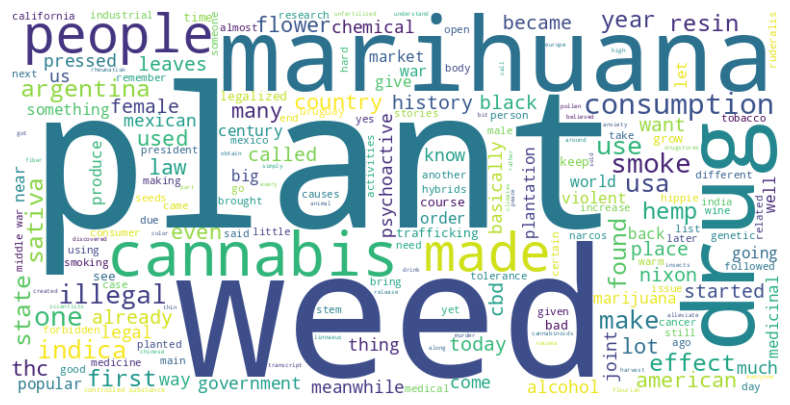

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


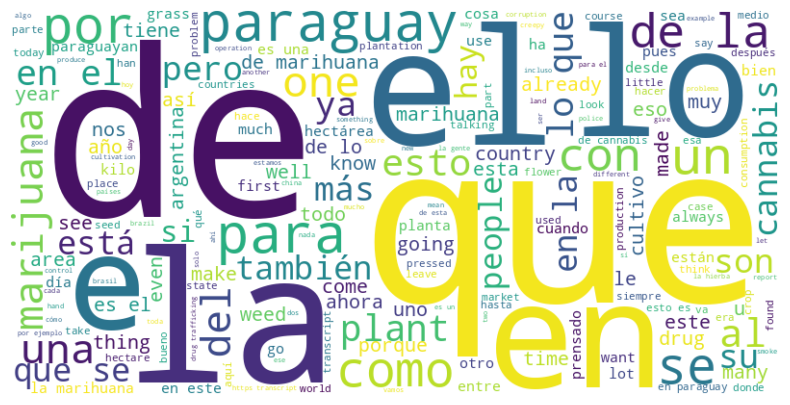

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Sentiment Analysis

# New Section

Use a pre-trained sentiment analyzer to evaluate the sentiment of each transcript.

In [ ]:
!pip install vaderSentiment
!pip install textblob


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

# Split the transcript into smaller sections, such as sentences or paragraphs
# Assuming each sentence ends with a period, split text at each period
sentences = data['Transcript'][0].split('.')
sentences = [sentence.strip() for sentence in sentences if sentence]  # Clean up empty or whitespace-only entries

# Create a DataFrame to hold each sentence
YTf1 = pd.DataFrame(sentences, columns=['Sentence'])
YTf1.head()


,Sentence
0,Transcripts\n1-Unnecessary Stories: The histor...
1,youtube
2,com/watch?v=7baUGImDBJE\nTranscript:\nWelcome ...
3,Today we're going to get to know its history\n...
4,Marijuana is the most popular drug in the worl...


In [ ]:
YTfiles_list = [pd.read_csv(file) for file in all_YTfiles]
combined_YTfiles = pd.concat(YTfiles_list, ignore_index=True)

In [ ]:
#Alternate code analyzer = SentimentIntensityAnalyzer()


**Interpret VADER’s Compound Score**

Scores range from -1 (most negative) to +1 (most positive).
Typically, a score < -0.05 is negative, > 0.05 is positive, and values in between are neutral.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Assuming your combined_YTfiles DataFrame has a column named 'Transcript' containing the full transcripts
# If it's named something else, replace 'Transcript' with the actual column name

# Create a new column 'Sentence' by splitting the 'Transcript' column into sentences
combined_YTfiles['Sentence'] = combined_YTfiles['Transcript'].str.split('.').str.join('.')

# Get sentiment scores for each sentence
combined_YTfiles['sentiment'] = combined_YTfiles['Sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as positive, neutral, or negative
combined_YTfiles['sentiment_label'] = combined_YTfiles['sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
print(combined_YTfiles[['Sentence', 'sentiment_label']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                            Sentence sentiment_label
0  Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...        negative
1  [['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...        negative
2  Transcripts\n10-Paraguay, principal productor ...        positive
3  [['Transcripts'], ['10-Paraguay, the main prod...        negative
4  Transcripts\n13-Informe Especial: La ruta de l...        negative


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer and assign to 'sia'
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each sentence
combined_YTfiles['VADER_Sentiment'] = combined_YTfiles['Sentence'].apply(lambda x: sia.polarity_scores(x)['compound'])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Option B: Using TextBlob (Good for General Text)
Apply TextBlob Sentiment Analysis.

In [ ]:
# TextBlob sentiment
YTf1['TextBlob_Polarity'] = YTf1['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)


**Interpret TextBlob’s Polarity Score.**

Polarity ranges from -1 (very negative) to +1 (very positive), with 0 indicating neutral sentiment.

# **Calculate Summary Statistics.**

In [ ]:
# Summary for VADER
vader_summary = combined_YTfiles['VADER_Sentiment'].describe()

# Summary for TextBlob
textblob_summary = combined_YTfiles['TextBlob_Polarity'].describe()

print("VADER Sentiment Summary:\n", vader_summary)
print("\nTextBlob Sentiment Summary:\n", textblob_summary)


In [ ]:
combined_YTfiles['TextBlob_Polarity'] = YTf1['TextBlob_Polarity'] # Add TextBlob_Polarity from YTf1 to combined_YTfiles

In [ ]:
from textblob import TextBlob
   combined_YTfiles['TextBlob_Polarity'] = combined_YTfiles['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity) # Calculate TextBlob_Polarity directly on combined_YTfiles if 'Sentence' column is present

In [ ]:
# TextBlob sentiment
YTf1['TextBlob_Polarity'] = YTf1['Sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)

# ... other code ...

# Summary for VADER
vader_summary = combined_YTfiles['VADER_Sentiment'].describe()

# Add TextBlob_Polarity from YTf1 to combined_YTfiles
combined_YTfiles['TextBlob_Polarity'] = YTf1['TextBlob_Polarity']

# Summary for TextBlob
textblob_summary = combined_YTfiles['TextBlob_Polarity'].describe()

print("VADER Sentiment Summary:\n", vader_summary)
print("\nTextBlob Sentiment Summary:\n", textblob_summary)

VADER Sentiment Summary:
 count    39.000000
mean     -0.090926
std       0.798728
min      -0.999000
25%      -0.845100
50%      -0.381800
75%       0.892950
max       0.999200
Name: VADER_Sentiment, dtype: float64

TextBlob Sentiment Summary:
 count    39.000000
mean      0.081750
std       0.169830
min      -0.330000
25%       0.000000
50%       0.053947
75%       0.177811
max       0.500000
Name: TextBlob_Polarity, dtype: float64


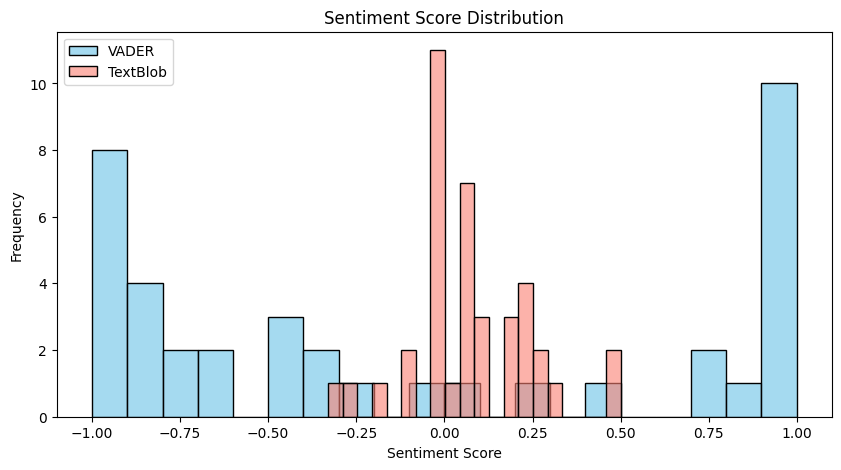

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(combined_YTfiles['VADER_Sentiment'], bins=20, color='skyblue', label='VADER')
sns.histplot(combined_YTfiles['TextBlob_Polarity'], bins=20, color='salmon', label='TextBlob', alpha=0.6)
plt.legend()
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


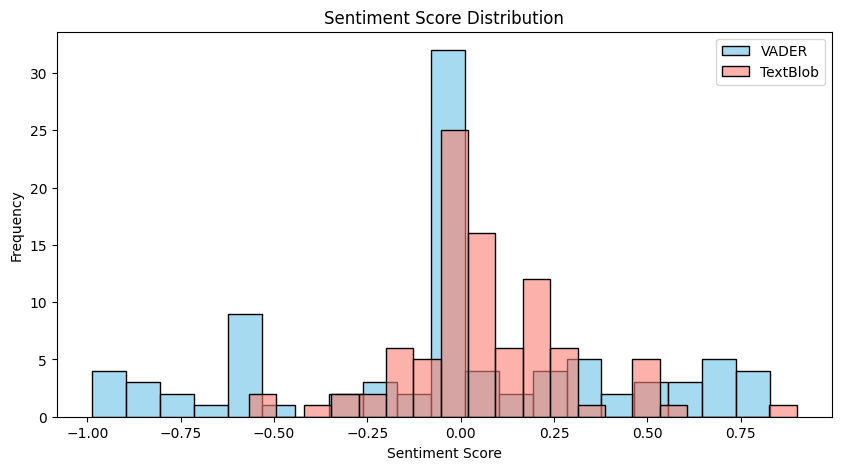

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(YTf1['VADER_Sentiment'], bins=20, color='skyblue', label='VADER')
sns.histplot(YTf1['TextBlob_Polarity'], bins=20, color='salmon', label='TextBlob', alpha=0.6)
plt.legend()
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


Step 6: **Analyze Results**
Review which sentences carry the strongest positive or negative sentiment, as this may provide insights into emotional tones around particular criminology topics.

In [ ]:
# Display top positive and negative sentences
most_positive = combined_YTfiles.sort_values(by='VADER_Sentiment', ascending=False).head(5)
most_negative = combined_YTfiles.sort_values(by='VADER_Sentiment').head(5)

print("Most Positive Sentences:\n", most_positive[['Sentence', 'VADER_Sentiment']])
print("\nMost Negative Sentences:\n", most_negative[['Sentence', 'VADER_Sentiment']])


Most Positive Sentences:
                                              Sentence  VADER_Sentiment
19  [['Transcripts'], ['4-What is Cripy and Pressi...           0.9992
29  [['Transcripts'], ['6-PARAGUAY: Will Peña be a...           0.9986
34  [['Transcripts'], ['3-How to press and chop ma...           0.9964
25  [['Transcripts'], ['15-ALL ABOUT PARAGUAYAN PR...           0.9951
32  [['Transcripts'], ['17-Cannabis oil against ep...           0.9682

Most Negative Sentences:
                                              Sentence  VADER_Sentiment
30  Transcripts\n1-Unnecessary Stories: The histor...          -0.9990
28  Transcripts\n6-PARAGUAY: ¿Podrá Peña cambiar a...          -0.9982
24  Transcripts\n15-TODO SOBRE EL PRENSADO PARAGUA...          -0.9877
37  Transcripts\n9-Destruyen cultivo de marihuana ...          -0.9578
4   Transcripts\n13-Informe Especial: La ruta de l...          -0.9371


**1. Sentiment Score Distribution**
Purpose: To understand the overall spread of sentiment (positive, neutral, or negative) in your transcript.
Visualization:
Histogram: Show the frequency distribution of sentiment scores, with separate histograms for both VADER and TextBlob results.
Kernel Density Estimate (KDE) Plot: Provides a smooth curve that can help in identifying where sentiment scores are concentrated.

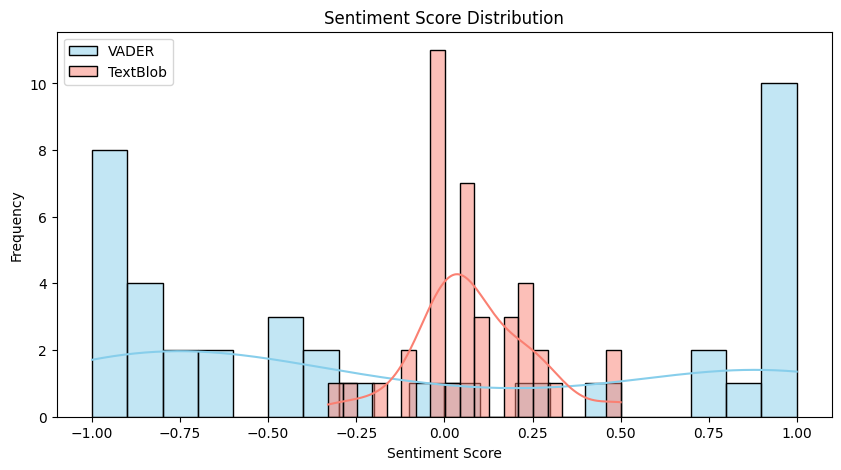

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(combined_YTfiles['VADER_Sentiment'], bins=20, color='skyblue', label='VADER', kde=True)
sns.histplot(combined_YTfiles['TextBlob_Polarity'], bins=20, color='salmon', label='TextBlob', kde=True, alpha=0.5)
plt.legend()
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


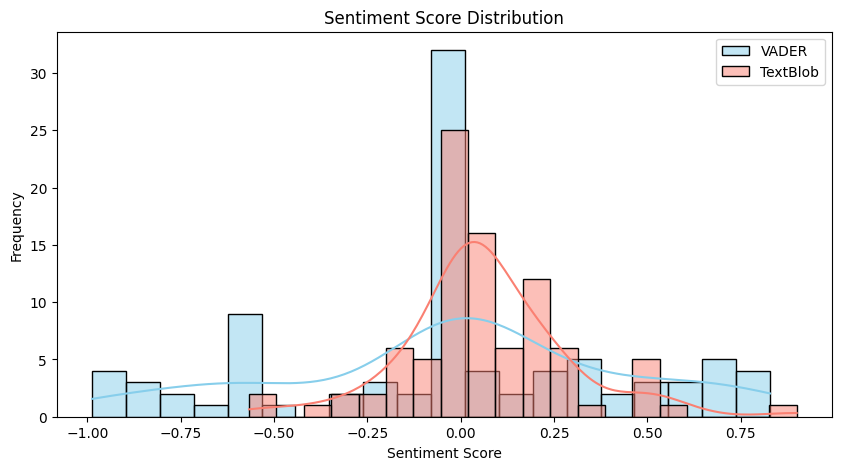

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(YTf1['VADER_Sentiment'], bins=20, color='skyblue', label='VADER', kde=True)
sns.histplot(YTf1['TextBlob_Polarity'], bins=20, color='salmon', label='TextBlob', kde=True, alpha=0.5)
plt.legend()
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


**2. Sentiment Over Transcript Sections**
Purpose: To visualize how sentiment changes over the course of the transcript. This is helpful for identifying emotional highs and lows or shifts in tone related to specific topics.
Visualization:
Line Plot: Plot the sentiment scores (from VADER or TextBlob) in the order they appear in the transcript. This can reveal peaks (strongly positive or negative segments) and valleys (neutral or mixed sentiment).

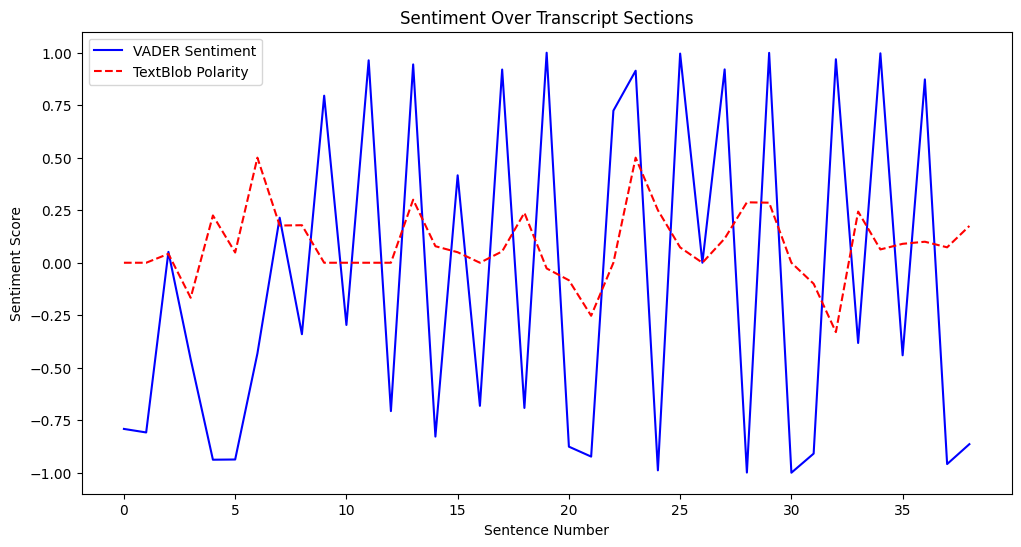

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(combined_YTfiles.index, combined_YTfiles['VADER_Sentiment'], label="VADER Sentiment", color='blue')
plt.plot(combined_YTfiles.index, combined_YTfiles['TextBlob_Polarity'], label="TextBlob Polarity", color='red', linestyle='--')
plt.title("Sentiment Over Transcript Sections")
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Score")
plt.legend()
plt.show()


**3. Top Positive and Negative Sentiments**
Purpose: To highlight the most positive and most negative sentences, which can provide insight into specific statements that evoke strong emotions.
Visualization:
Bar Chart: Display the top 5 positive and top 5 negative sentences along with their sentiment scores.

In [ ]:
top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")
plt.tight_layout()
plt.show()


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")

# The problem is likely due to special characters in the sentence text
# that are being interpreted as LaTeX commands.

# We can escape these characters or disable LaTeX rendering for the tick labels:

# Option 1: Escape special characters
# (This is more robust but may require knowing the specific characters causing the issue)
# Example: If the issue is caused by '^' or '_', you can replace them:
# top_positive['Sentence'] = top_positive['Sentence'].str.replace('^', '\\^').str.replace('_', '\\_')
# top_negative['Sentence'] = top_negative['Sentence'].str.replace('^', '\\^').str.replace('_', '\\_')

# Option 2: Disable LaTeX rendering for tick labels
# (This is a simpler solution but disables mathematical formatting)
for axes in ax:
    axes.set_yticklabels(axes.get_yticklabels(), usetex=False)

plt.tight_layout()
plt.show()

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")

# The problem is likely due to special characters in the sentence text
# that are being interpreted as LaTeX commands.

# We can escape these characters or disable LaTeX rendering for the tick labels:

# Option 1: Escape special characters
# (This is more robust but may require knowing the specific characters causing the issue)
# Example: If the issue is caused by '^' or '_', you can replace them:
# top_positive['Sentence'] = top_positive['Sentence'].str.replace('^', '\\^').str.replace('_', '\\_')
# top_negative['Sentence'] = top_negative['Sentence'].str.

Text(0.5, 1.0, 'Top Negative Sentences')

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")

# The problem is likely due to special characters in the sentence text
# that are being interpreted as LaTeX commands.

# We can escape these characters or disable LaTeX rendering for the tick labels:

# Option 1: Escape special characters
# (This is more robust but may require knowing the specific characters causing the issue)
# Example: If the issue is caused by '^' or '_', you can replace

Text(0.5, 1.0, 'Top Negative Sentences')

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")

# The problem is likely due to special characters in the sentence text
# that are being interpreted as LaTeX commands.

# Disable LaTeX rendering for tick labels
for axes in ax:
    axes.set_yticklabels(axes.get_yticklabels(), usetex=False)
    # This line disables the use of LaTeX for rendering tick labels,
    # preventing the misinterpretation of special characters.

plt.tight_layout()
plt.show()

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")

# Disable LaTeX rendering for tick labels to avoid misinterpretation of special characters:
for axes in ax:
    axes.set_yticklabels(axes.get_yticklabels(), usetex=False)

# Adjust subplot parameters to accommodate long sentences if needed
plt.subplots_adjust(bottom=0.2) # Increase bottom margin

plt.tight_layout()
plt.show()

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_positive = combined_YTfiles.nlargest(5, 'VADER_Sentiment')
top_negative = combined_YTfiles.nsmallest(5, 'VADER_Sentiment')

fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(y=top_positive['Sentence'], x=top_positive['VADER_Sentiment'], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Positive Sentences")
sns.barplot(y=top_negative['Sentence'], x=top_negative['VADER_Sentiment'], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Negative Sentences")

# Disable LaTeX rendering for tick labels to avoid misinterpretation of special characters:
for axes in ax:
    axes.set_yticklabels(axes.get_yticklabels(), usetex=False)

# Adjust subplot parameters to accommodate long sentences if needed
plt.subplots_adjust(bottom=0.2) # Increase bottom margin

# Escape special characters in the 'Sentence' column:
# The '^' character is often interpreted as a LaTeX command.
# This line will replace all instances of '^' with '\\^' to escape it.
top_positive['Sentence'] = top_positive['Sentence'].str.replace('^', '\\^', regex=True)
top_negative['Sentence'] = top_negative['Sentence'].str.replace('^', '\\^', regex=True)

plt.tight_layout()
plt.show()

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

ValueError: 
[['Transcripts'], ['6-PARAGUAY: Will Peña be able to change the LARGEST PRODUCER of (illegal) MARIJUANA in the world? - VisualPolitik'], ['https://www.youtube.com/watch?v=2esrFA6dNEU'], ['Transcript:'], ["I'm sure that if I asked you to locate it on a map or tell me something characteristic"], ['From countries like Colombia, Venezuela, Argentina or Brazil, most of you would know how to do it.'], ['However, there are other Latin American countries that, without knowing why, tend to'], ['almost always go completely unnoticed. And you know what? That is precisely the case'], ['from our protagonist today: Paraguay. Think about it, what do you know about Paraguay?'], ['Surely, surely many of you would not know how to answer this question.'], ['[And yes, this is the first video specifically dedicated to Paraguay in the entire history of'], ['VisualPolitik. It was about time] The fact is that together with its neighbor Bolivia,'], ['Paraguay is the other landlocked country in Latin America, and it is also located'], ['right next to two of the regional powers: Brazil and Argentina.'], ['And, it is true, Paraguay is not as well known as its two neighboring powers, but this'], ['This does not mean that it does not have some characteristics that surely, surely attract our attention.'], ['to everyone. For example, being the first producer of'], ['marijuana from all over South America is something that inevitably puts it on the international radar.'], ['And not only that, from Argentina Paraguay has often been accused of being, even,'], ['a tax haven for having a corporate tax and VAT of only 10%.'], ["But, let's be honest, of course, if we compare it with Argentina, any place"], ['It will seem like a tax haven. Whatever the case, the fact is that Paraguay in 2022'], ['was in the spotlight not because of taxes or marijuana, but because of this tragic'], ['news:'], ['N1(Paraguayan anti-mafia prosecutor murdered in Colombia during his honeymoon. Euronews)'], ['Indeed, dear friends, last year prosecutor Marcelo Pecci was murdered. This'], ['The prosecutor was a key part of the anti-drug trafficking operation known as “A Ultranza”'], ['Paraguay”. In addition, he had been collaborating with the'], ['DEA and Europol. To give you an idea, I had managed to identify and detect'], ['to powerful businessmen and politicians, both from Paraguay and from some countries in Europe,'], ['involved in cocaine trafficking. Unfortunately, just 3 months after the'], ['carry out more than 100 simultaneous raids and seize property valued at more than'], ['100 million dollars, in May 2022 he was murdered in front of his wife in the'], ['city \u200b\u200bof Cartagena, Colombia. [Yes, these things keep happening beyond'], ["[Netflix] Now, don't think that it was an isolated incident."], ['The truth is that this case is closely linked to the most endemic problems that Paraguay suffers.'], ['Think about it, we are talking about one of the largest marijuana producers in the world and now'], ["also a main point in the distribution of cocaine. Don't you think that Pecci was bothering"], ['to some people? But be careful! Because in a country like Paraguay'], ['We are not just talking about drug traffickers, but something much deeper.'], ['Dear friends, what problems exactly is Paraguay facing? So far'], ['To what extent can we consider them as something international? Will the new president be able to'], ['put things in order? In this video we are going to answer these questions.'], ["and other questions. But first, let's look at a little history."], ['T1(THE LONG POLITICAL TRADITION)'], ['One might think that the modern history of Paraguay is like that of any other.'], ['another Latin American country: that is, since independence, a constant succession'], ['of democratic periods and dictatorships of all kinds.'], ['And in part it is, but Paraguay has a peculiarity that practically no one'], ['of its neighbors has had [Unless we consider, of course, Mexico as a neighboring country]'], ['I am referring to the total political dominance of a single party, the National Association'], ['Republican Party, better known as the Colorado Party. And, mind you, we are talking about a'], ['impregnable.'], ['(Founded in 1870, the Colorado Party did not enjoy continued power until it governed'], ['the country during the 17 years between 1887 and 1904. However, its maximum splendor'], ['He still had to wait a few years.'], ['It was in 1954, with the beginning of the brutal regime of General Alfredo Stroessner - supported by'], ['true for the United States - when the Colorado Party began its total hegemony'], ['politics. After all, Stroessner was the president of this party for the entire'], ['the dictatorship.'], ['However, when democracy finally came in 1993, unlike what had happened'], ['In many other countries, the dominance of this party did not suffer too many setbacks.)'], ['And in fact, since then, the presidency of the Colorados was only disturbed by'], ['the presidency of Fernando Lugo and very temporarily by that of Federico Franco between the years'], ['2008 y 2013.'], ["However, Lugo's presidency was marred by the Curuguaty massacre, when"], ['11 farmers and 6 national police officers lost their lives in a confrontation to evict'], ['lands that had been occupied for more than a month. Although it is not entirely clear what happened'], ['really because a lot of evidence disappeared and apparently the police did not follow the'], ['orders from the Ministry of the Interior to confiscate only weapons from peasants.'], ['But, whatever the case, the reality is that this ended with an impeachment that expelled'], ['Lugo from the presidency, which was a hard blow for the alternative candidates'], ['to the Colorado Party… Which returned to power never to let go again.'], ['In 2013 Horacio Cartes won, in 2018 Mario Abdo Benítez and the last one, at the end of April'], ['of 2023, Santiago Peña. All of them candidates, of course, from the Colorado Party.'], ['Santiago Peña, a 44-year-old economist who has worked for the IMF and the Central Bank'], ['from Paraguay, who was already Minister of Finance in the past, takes the reins of a country'], ['which has seen strong economic growth since the beginning of the century, but which'], ['is severely affected by poverty, drug trafficking and other endemic problems. Problems'], ['which he will now have to face. Now, what exactly are we talking about?'], ['Well… Pay attention.'], ["T2 (AT THE SERVICE OF BRIBES) I'm sure many of you have already noticed"], ['that the situation of the Colorado Party is quite similar to that of the PRI during'], ['those long 70 years that he governed Mexico without interruption.'], ['And, of course, with so much time in power, without any alternation, I think we all know'], ['What was the result: rampant corruption and influence peddling turned into'], ['a priority for politicians. However, the case of Paraguay has not been different.'], ['. Therefore, it is not surprising that, at the beginning of 2023, we came across this news:'], ["N2 (US sanctions Paraguay's vice president and former president for corruption."], ['The former president and the current vice president have been implicated in a system of corruption'], ['which has undermined the democratic institutions of his country. El País)'], ['Indeed, dear friends of VisualPolitik, both former President Horacio Cartes and'], ['The current vice president, Hugo Velázquez, have been sanctioned by the United States government'], ['United by their continued corruption. For example, Cartes, who is still one'], ["of the country's richest businessmen, apparently paid members of his party 10,000"], ['dollars per head to support his candidacy for president. And not only that, he also'], ['has been involved in smuggling activities, for example, smuggling its own tobacco into Argentina'], ['and Brazil. And not only that, but also, both Cartes'], ['Like Velázquez, they have even been accused of accepting bribes from the Lebanese Islamist group.'], ['Hezbollah, which the United States considers a terrorist group because of its ties to Iran.'], ['However, these are not the only cases of large-scale corruption that we can find.'], ['in the country. For example, during the early stages of'], ['Covid-19, the government ordered citizens to buy medicines that would cushion the pain'], ['symptoms of Covid to private pharmacies. What was the problem? Well, as stated'], ['In the boxes of the medicines themselves, these were intended for hospitals'], ['public. And what does this mean? Well, basically, that the medicines in hospitals'], ['They were sold on the black market… So you either paid a fortune or you were left behind.'], ['you were left without them. Something that, by the way, triggered massive protests.'], ['No wonder. Think about it, Paraguay does not have the best economic conditions.'], ["of the world. Okay, yes, it's true, its GDP per capita has grown a lot from $1,700"], ['in the year 2000 to the current 5,900... Which is obviously different, no matter how you look at it.'], ["Let's look at it, it means that we are still talking about a fairly poor country in general."], ['And in fact, its Human Development Index is the lowest among its neighbors, except'], ['from Bolivia, and the number of poor people remains very high.'], ['But even more, what if I told you that corruption and influence peddling are up to'], ['a certain point normalized in Paraguayan society? Well… Look.'], ['(In Paraguay, taking advantage of the position of a friend, family member or acquaintance to improve'], ['The condition itself even has its own word: “orekueté”, which comes from the'], ['Guaraní language. It certainly sounds better than influence peddling.'], ['But not only the ethics of “orekueté” is accepted. Corruption is also accepted.'], ['It is a fundamental part of the daily life of Paraguayan society. It is true, it is not corruption'], ['huge that moves millions on a large scale, but the "bribes", the small bribes,'], ['They are the order of the day, especially when it comes to streamlining administrative procedures.'], [') You see, corruption is rife'], ["In Paraguay, while 25% of the country's 7 million people, that is, about 2 million,"], ['continue to live in poverty. And, for many analysts, this poverty is the cause of another'], ["of the country's serious problems. Can you imagine what it could be? Let's see."], ['T3 (THE TRIPLE FRONTIER) Over the years, we have told you'], ['Here at VisualPolitik there are many cases in which, due to poverty, people have ended up'], ['Diving into the world of crime to improve their position: whether in Mexico with drug traffickers'], ['or in Nigeria with groups that steal oil, among other examples.'], ['Well, according to many analysts, this is also the case in Paraguay.'], ['However, not everyone agrees: for some it is the absence of the State and the lack'], ['of the media, which has made organized crime in Paraguay become'], ["a thriving industry. For example, the Paraguayan People's Army,"], ['which is a guerrilla organization that was born in 2008 with a Marxist-Leninist ideology,'], ['has been and continues to be widely supported by some peasants who feel abandoned'], ['by the State. However, although this guerrilla group'], ['Although this is a constant concern for the government, it is not, by far, its biggest problem.'], ['For that we have to go to the so-called Triple Border.'], ['(The Triple Frontier is where the borders between Paraguay, Brazil and Argentina meet, which are'], ['divided by the Paraná River. Well, this point is considered one of the most important'], ['hottest in the world in terms of crime.) The weakness or even absence of mechanisms'], ['and border officials capable of expediting cross-border trade between the 3 countries'], ['has made international organized crime groups find themselves in the Triple Border'], ['a relatively comfortable space in which to operate.'], ['We are talking about a space where criminal group operations have been detected.'], ['such as the Taiwanese Bamboo Kingdom, the Russian mafia or even the Japanese yakuza.'], ['Of course, none of them have as much presence or power in the Triple Border and'], ['Paraguay as the Brazilian First Capital Command, the PCC. It is this group that'], ['controls drug trafficking routes between Brazil, Bolivia and Paraguay.'], ['And you may be wondering, how can such a concentration of bands and'], ['organized crime groups? Well, for one simple reason: the lack of means of control.'], ['In this way, while legal trade suffers all kinds of restrictions, the boats'], ['and barges that drug traffickers use to cross the Paraná River and reach the Iguazú River to'], ['Going to Brazil, for example, they often do so without having to stop to be searched.'], ['due to lack of resources. And three quarters of the same thing happens with'], ['The trucks of merchants crossing from Paraguay to Brazil over the bridge'], ['friendship. In this case, it is also common to use double bottoms in the trucks that'], ['They transport wood and soybeans. But, not only that, even the planes that'], ['They arrive loaded with cocaine from Bolivia to Paraguay and land on airstrips'], ['clandestine operations are not detected due to the lack of radar.'], ['However, even though the lack of means of control by the State is more than'], ['Obviously, that may not be the only problem. Let me explain, many analysts wonder'], ['If these groups are not acting with total impunity, that is, behind everything would return'], ['to the widespread corruption of the public sector.'], ['C1 (“Corruption makes it possible to negotiate, in particular, compliance with the'], ['norm in order to evade its compliance. The direct consequence is impunity and'], ['The aim of these networks is to avoid arrest, trial or imprisonment.'], ['to jail (…)” – Sonia Alda Mejías, PhD in History from the Autonomous University'], ['from Madrid and researcher at the Elcano Royal Institute, 2020.)'], ['However, Paraguay is not only a kind of symbiosis between the criminal world and the'], ['corruption. Paraguay also has a characteristic that makes it especially relevant in the'], ['global geopolitics. Pay close attention.'], ['T4 (AN INCREASINGLY LIMITED CLUB) If you are faithful followers of VisualPolitik,'], ["I'm sure you know that there are not many countries left that recognize the Republic of"], ['China, that is, Taiwan, like the real China.'], ['We are essentially talking about some small island nations in Oceania such as Nauru or the'], ['Marshall Islands, the Vatican City in Europe or the former Swaziland in Africa'], ['that continue to maintain this recognition… A recognition that is, precisely, in'], ['Latin America where it has the most weight.'], ['It is true, most are small Caribbean islands like Saint Lucia, but, for example,'], ['Guatemala, Belize and Haiti still recognize Taiwan as the real China. And do you know?'], ['Tell me that another country does the same? 3, 2, 1… Exactly! We are talking about Paraguay. And'], ['In fact, although it is not the most populated of all of them, it is the largest. And,'], ["You might ask, why has Paraguay not yet recognized the People's Republic of China?"], ['as the vast majority of its neighbouring countries have done? Well, basically, we could'], ['To sum it up, Paraguay is a very loyal friend.'], ["And you see, since General Stroessner's Paraguay recognized Taiwan"], ['of Chiang-Kai-shek for the anti-communist values \u200b\u200bthat both countries shared, Paraguay'], ['has greatly benefited from its friendship with the Asian country.'], ['Whether through military support, training soldiers, sending weapons, or through scholarships'], ['university students to young Paraguayans so that they can study in Taiwan, the small'], ['Asian country has shown off its economic diplomacy to maintain its relationship with'], ['the largest country to recognize it. In fact, the seat of the Paraguayan Congress,'], ['Opened in 2003, it was built in part with a $20 million grant from'], ['Taiwan gave it to him. In addition, the Colorado Party also belongs to the World League for the'], ['Freedom and Democracy, the former World Anti-Communist League that was founded in Taiwan'], ["in 1966. And, not only that, Paraguay's proximity to Taiwan has also meant that, above all,"], ['Since the Trump administration, relations with the United States have strengthened.'], ['However, do not think that this friendship pleases everyone. There are many who see in this'], ['relationship a lost opportunity to earn more money if the Republic were recognized'], ["People's Republic of China. And, well, they are perhaps somewhat right."], ['In fact, there are many Paraguayan businessmen and politicians who believe that if it were recognized'], ["Xi Jinping's regime could achieve a positive trade balance in the country."], ['An example of this discontent is the Paraguayan Association of Producers and Exporters of'], ['Meat, which has repeatedly complained about import quotas on meat'], ["Taiwan imposes. A problem that Chiang Kai-shek's country"], ['solved in 2020 when it eliminated those quotas and allowed the entry of Paraguayan meat'], ['virtually without restrictions. In this way, the Paraguayan government managed to'], ['that their farmers did not feel that they were falling behind compared to Argentina,'], ['Brazil or Uruguay, countries that do have enormous trade with China.'], ['However, it is these three countries that perhaps feel the greatest frustration with this.'], ["Paraguay's decision. You see, Paraguay, along with Argentina, Brazil"], ['and Uruguay, form the Southern Common Market, commonly called Mercosur.'], ['And what is Mercosur? Very simple: it is a common market where products and people'], ['from the four countries can move more or less freely between them.'], ['And not only that, but also free trade agreements with other countries that are not part of it.'], ['Mercosur are negotiated jointly. And what does this mean? Well, if the'], ['4 members do not vote in favor of closing a trade agreement with a specific country, they simply'], ["This cannot be carried out. I'm sure you know where things are going now."], ['complaints from Mercosur partners. Indeed, dear friends, both Brazil and Argentina'], ['and Uruguay want to close a free trade agreement with China. What is the problem?'], ['That Paraguay does not vote in favor because it recognizes Taiwan and not China, and if it does not vote in favor,'], ['The agreement is not closed. That is why, from the presidency of Fernando'], ['Lugo in 2008, and even with Abdo Benítez, the option of changing from one has been considered'], ['Taiwan was once and for all chosen by China, but in the end no one dared to take the step.'], ['And Santiago Peña has already made it absolutely clear that his preferred partner will continue to be'], ['Taiwan: C2 (“Paraguay has a historical relationship'], ['with Taiwan and this relationship cannot be quantified simply in economic terms. There are'], ['more than just trade. Trade is important, we need to generate progress,'], ['But we also have to understand that relationships have to be based on democratic values.”'], ['– Santiago Peña, President-elect of Paraguay, 2023.)'], ['You see, dear friends of VisualPolitik, the challenges that await Santiago Peña'], ['They are no small thing: apart from the poverty in the country, the constant increase in crime'], ['organized crime and endemic corruption will be priority issues.'], ["However, just as many hope to see no change in Paraguay's position"], ['In the face of Taiwan, there are also many doubts that Peña will attack the corruption of the'], ['country. After all, former President Horacio'], ['Cartes, the same one who has been sanctioned by the United States for his corruption, is his mentor'], ['politician, and many already suspect that he will protect him at all costs.'], ['But the question now is for you: do you think Santiago Peña will succeed in making Paraguay'], ['a more transparent country? What do you think is the best way to deal with crime?'], ['organized by the Triple Frontier? Will Paraguay finally succumb to the attractive Chinese market?'], ['Or, on the contrary, will he remain faithful to one of his old friend Taiwan? You can let me know'], ["your answer in the comments. As always, don't forget that here at VisualPolitik"], ['We release new videos every week so subscribe to this channel and give it a go.'], ["bell so you don't miss any of our updates. If you liked this video,"], ["Give it a LIKE and we'll see you next time. Greetings and see you soon."]]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ^
ParseException: Expected end of text, found '$'  (at char 8990), (line:1, col:8991)

<Figure size 1400x600 with 2 Axes>

**4. Word Clouds for Positive and Negative Sentences**
Purpose: To visualize frequently used words within positive and negative sentences. This can help identify key terms associated with positive or negative emotions in the criminology context.
Visualization:
Word Cloud: Generate separate word clouds for sentences with positive and negative sentiment scores.

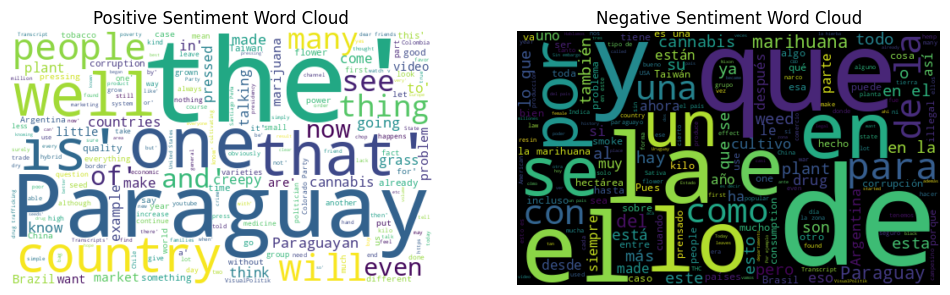

In [ ]:
from wordcloud import WordCloud

# Combine all positive and negative sentences into separate strings
positive_text = ' '.join(top_positive['Sentence'])
negative_text = ' '.join(top_negative['Sentence'])

# Generate word clouds
positive_wc = WordCloud(width=500, height=300, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=500, height=300, background_color='black').generate(negative_text)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")

plt.show()


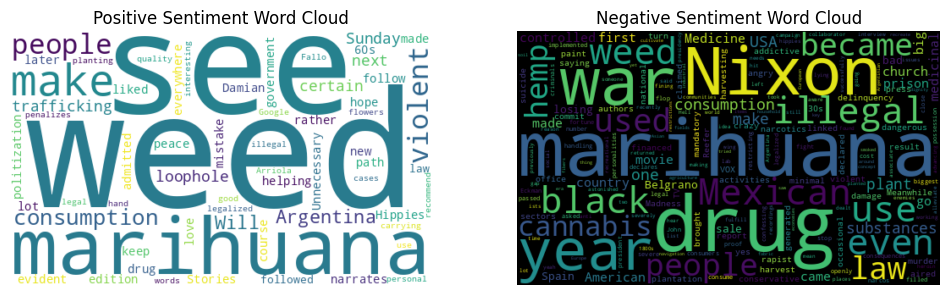

In [ ]:
from wordcloud import WordCloud

# Combine all positive and negative sentences into separate strings
positive_text = ' '.join(top_positive['Sentence'])
negative_text = ' '.join(top_negative['Sentence'])

# Generate word clouds
positive_wc = WordCloud(width=500, height=300, background_color='white').generate(positive_text)
negative_wc = WordCloud(width=500, height=300, background_color='black').generate(negative_text)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")

plt.show()


**5. Sentiment Correlation (If Using Multiple Sentiment Models)**
Purpose: To assess how well VADER and TextBlob sentiment scores align or differ across sentences, which can highlight consistency or variation in sentiment detection.
Visualization:
Scatter Plot: Plot VADER vs. TextBlob scores to see correlations. A high correlation (points near a diagonal line) indicates consistency, while large variances may reveal unique model behavior.

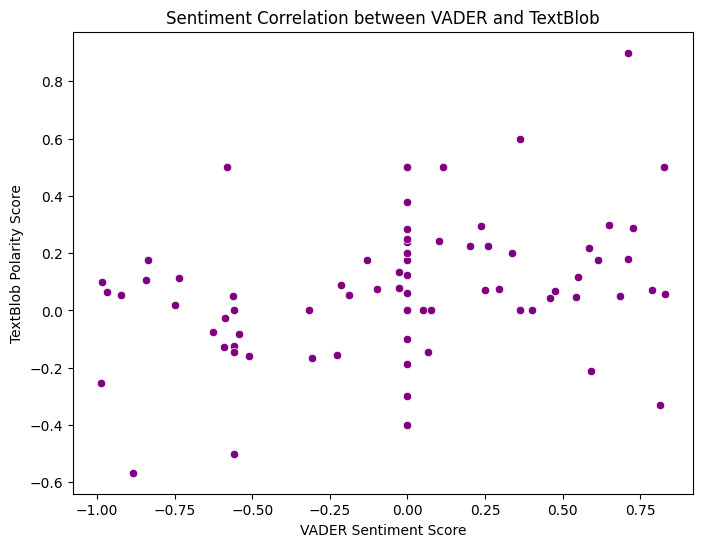

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='VADER_Sentiment', y='TextBlob_Polarity', data=YTf1, color='purple')
plt.title("Sentiment Correlation between VADER and TextBlob")
plt.xlabel("VADER Sentiment Score")
plt.ylabel("TextBlob Polarity Score")
plt.show()


# Topic Modeling
Using Latent Dirichlet Allocation (LDA) to identify topics within the text data.



1.   Create a Dictionary and Corpus

        Prepare the data for topic modeling by creating a dictionary and a corpus.

In [ ]:
dictionary = corpora.Dictionary(combined_YTfiles['processed_text'])
corpus = [dictionary.doc2bow(text) for text in combined_YTfiles['processed_text']]


KeyError: 'processed_text'

In [ ]:
# Verify the column names in your DataFrame
print(combined_YTfiles.columns)

# If 'processed_text' is not present, correct the column name
# Assuming the correct column name is 'Transcript' (based on global variables)
dictionary = corpora.Dictionary(combined_YTfiles['Transcript'])
corpus = [dictionary.doc2bow(text

In [ ]:
# Verify the column names in your DataFrame
print(combined_YTfiles.columns)

# If 'processed_text' is not present, correct the column name
# Assuming the correct column name is 'Transcript' (based on global variables)
dictionary = corpora.Dictionary(combined_YTfiles['Transcript'])
corpus = [dictionary.doc2bow(text) for text in combined_YTfiles['Transcript']]

# Alternatively, if you need to create the 'processed_text' column:
# Assuming 'Transcript' contains raw text
# Import necessary libraries for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

combined_YTfiles['processed_text'] = combined_YTfiles['Transcript'].apply(preprocess_text)

dictionary = corpora.Dictionary(combined_YTfiles['processed_text'])
corpus = [dictionary.doc2bow(text) for text in combined_YTfiles['processed_text']]

Index(['Transcript', 'Sentence', 'sentiment', 'sentiment_label',
       'VADER_Sentiment', 'TextBlob_Polarity'],
      dtype='object')


TypeError: doc2bow expects an array of unicode tokens on input, not a single string


2.   Build the LDA Model

  Build an LDA model to find topics.

In [ ]:
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Display the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")


Topic 1: 0.014*"paraguay" + 0.010*"marijuana" + 0.010*"one" + 0.009*"country" + 0.005*"drug" + 0.004*"know" + 0.004*"well" + 0.004*"see" + 0.004*"many" + 0.004*"also"
Topic 2: 0.007*"like" + 0.006*"one" + 0.005*"say" + 0.005*"see" + 0.005*"thing" + 0.005*"tobacco" + 0.005*"system" + 0.004*"know" + 0.004*"already" + 0.004*"well"
Topic 3: 0.056*"de" + 0.040*"la" + 0.039*"que" + 0.029*"el" + 0.025*"en" + 0.018*"e" + 0.015*"se" + 0.012*"los" + 0.010*"un" + 0.010*"para"
Topic 4: 0.023*"que" + 0.012*"de" + 0.011*"el" + 0.009*"para" + 0.009*"lo" + 0.009*"se" + 0.008*"la" + 0.008*"e" + 0.007*"como" + 0.007*"los"
Topic 5: 0.009*"plant" + 0.008*"like" + 0.007*"marijuana" + 0.007*"cannabis" + 0.007*"also" + 0.007*"drug" + 0.007*"one" + 0.006*"people" + 0.005*"weed" + 0.005*"thing"


Step 7: TF-IDF Analysis
Calculate the term frequency-inverse document frequency (TF-IDF) to find the most important words in each transcript.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your data is in a CSV file named 'your_data.csv' with a 'text' column
# Replace 'your_data.csv' with the actual file name
Youtube_transcript = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=2, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(Youtube_transcript['text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display top words in each document based on TF-IDF scores
for i, row in enumerate(tfidf_matrix):
    print(f"Document {i+1}")
    row_data = row.toarray().flatten()
    top_indices = row_data.argsort()[-10:]  # Get indices of top 10 words
    top_words = [(feature_names[idx], row_data[idx]) for idx in top_indices]
    print(top_words)
# Assuming your data is in a CSV file named 'your_data.csv' with a 'text' column
# Replace 'your_data.csv' with the actual file name
Youtube_transcript = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=2, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display top words in each document based on TF-IDF scores
for i, row in enumerate(tfidf_matrix):
    print(f"Document {i+1}")
    row_data = row.toarray().flatten()
    top_indices = row_data.argsort()[-10:]  # Get indices of top 10 words
    top_words = [(feature_names[idx], row_data[idx]) for idx in top_indices]
    print(top_words)

KeyError: 'text'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your data is in a CSV file named 'your_data.csv' with a 'text' column
# Replace 'your_data.csv' with the actual file name
Youtube_transcript = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=2, stop_words='english')

# Fit and transform the text data
# Changed 'df' to 'Youtube_transcript'
tfidf_matrix = tfidf_vectorizer.fit_transform(Youtube_transcript['Transcript'])

 # Assuming 'Transcript' is the column containing the text

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display top words in each document based on TF-IDF scores
for i, row in enumerate(tfidf_matrix):
    print(f"Document {i+1}")
    row_data = row.toarray().flatten()
    top_indices = row_data.argsort()[-10:]  # Get indices of top 10 words
    top_words = [(feature_names[idx], row_data[idx]) for idx in top_indices]
    print(top_words)

# Step 7: Advanced Analysis and Modeling
Depending on your goals, you may use:



1.   Correlations Analysis: Determine relationships between variables.
Regression/Classification Models if you have
2.   Regression/Classification Models if you have predictive tasks.

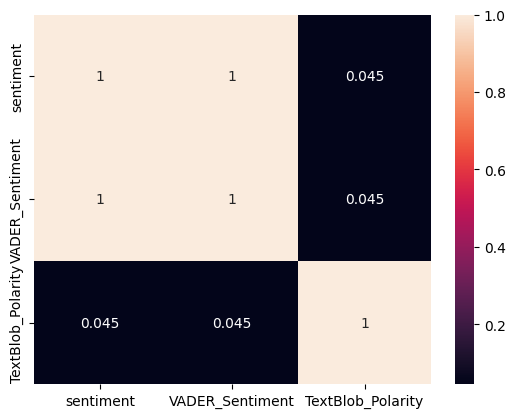

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select only numerical columns for correlation
numerical_combined_YTfiles = combined_YTfiles.select_dtypes(include=['number'])

# Correlation matrix
correlation = numerical_combined_YTfiles.corr()
sns.heatmap(correlation, annot=True)
plt.show()

2.   Visualize Results
Create plots, such as bar charts of sentiment distribution or top words per topic, to summarize findings visually.



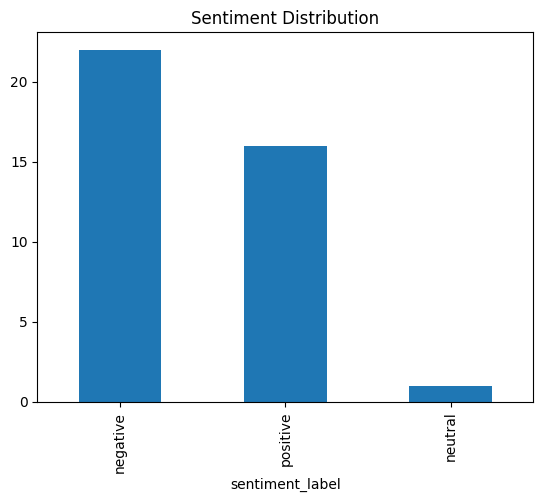

In [ ]:
# Plot sentiment distribution
combined_YTfiles['sentiment_label'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.show()


#2. Topic modeling and keyword extraction techniques.

guide using Latent Dirichlet Allocation (LDA) for topic modeling and TF-IDF for keyword extraction.

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure stopwords are available
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Lowercase and remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Tokenize and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to each sentence
combined_YTfiles['Cleaned_Sentence'] = combined_YTfiles['Sentence'].apply(preprocess_text)
combined_YTfiles.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Transcript,Sentence,sentiment,sentiment_label,VADER_Sentiment,TextBlob_Polarity,processed_text,Cleaned_Sentence
0,Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...,Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...,-0.7906,negative,-0.7906,0.000000,"[transcript, en, paraguay, ntn24, rcn, tv, htt...",transcripts marihuana en paraguay ntn rcn tv h...
1,"[['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...","[['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...",-0.8074,negative,-0.8074,0.000000,"[paraguay, ntn24, rcn, tv, latest, global, rep...",transcripts marijuana paraguay ntn rcn tv http...
2,"Transcripts\n10-Paraguay, principal productor ...","Transcripts\n10-Paraguay, principal productor ...",0.0516,positive,0.0516,0.042273,"[transcript, principal, productor, de, marigua...",transcripts paraguay principal productor de ma...
3,"[['Transcripts'], ['10-Paraguay, the main prod...","[['Transcripts'], ['10-Paraguay, the main prod...",-0.4588,negative,-0.4588,-0.166667,"[main, producer, marijuana, south, america, ar...",transcripts paraguay main producer marijuana s...
4,Transcripts\n13-Informe Especial: La ruta de l...,Transcripts\n13-Informe Especial: La ruta de l...,-0.9371,negative,-0.9371,0.225000,"[transcript, especial, la, ruta, de, la, marih...",transcripts informe especial la ruta de la mar...


Step 2: Extract Keywords Using TF-IDF
TF-IDF helps identify important terms that characterize the document, useful for discovering keywords related to criminology themes.

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=2, max_features=1000)  # Adjust parameters as needed

# Fit and transform the cleaned sentences
tfidf_matrix = tfidf_vectorizer.fit_transform(YTf1['Cleaned_Sentence'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame for easy viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
tfidf_df.head()


Step 3: Topic Modeling with Latent Dirichlet Allocation (LDA)
We’ll use LDA, a popular technique to identify underlying topics in text data. Each topic will have a set of words that represents it.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
num_topics = 5  # Adjust based on desired number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda_matrix = lda_model.fit_transform(tfidf_matrix)

# Function to display the topics with their top words
def display_topics(model, feature_names, num_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

# Display topics
display_topics(lda_model, tfidf_feature_names)


Topic #1:
marijuana one paraguay drug like well also already plant hectares
Topic #2:
senad tons drugs plantations pcc luis brazil producer dollars groups
Topic #3:
armando inner owned phenyl roughly massive pot fields mean luis
Topic #4:
kg luis senad nations alfredo tons pcc na armando pot
Topic #5:
de que la el en es se los para un


Step 4: Assign Dominant Topics to Each Sentence
This step involves assigning each sentence in the YTf1 DataFrame a dominant topic, which will help in identifying common themes.

In [ ]:
# Find the dominant topic for each sentence
combined_YTfiles['Dominant_Topic'] = lda_matrix.argmax(axis=1)

# Display sentences along with their dominant topics
combined_YTfiles[['Sentence', 'Dominant_Topic']].head()


,Sentence,Dominant_Topic
0,Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...,4
1,"[['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...",0
2,"Transcripts\n10-Paraguay, principal productor ...",4
3,"[['Transcripts'], ['10-Paraguay, the main prod...",0
4,Transcripts\n13-Informe Especial: La ruta de l...,4


Step 5: Visualize Topic Distribution (Optional)
To visualize the distribution of topics in the transcript, a bar chart or pie chart can be useful.

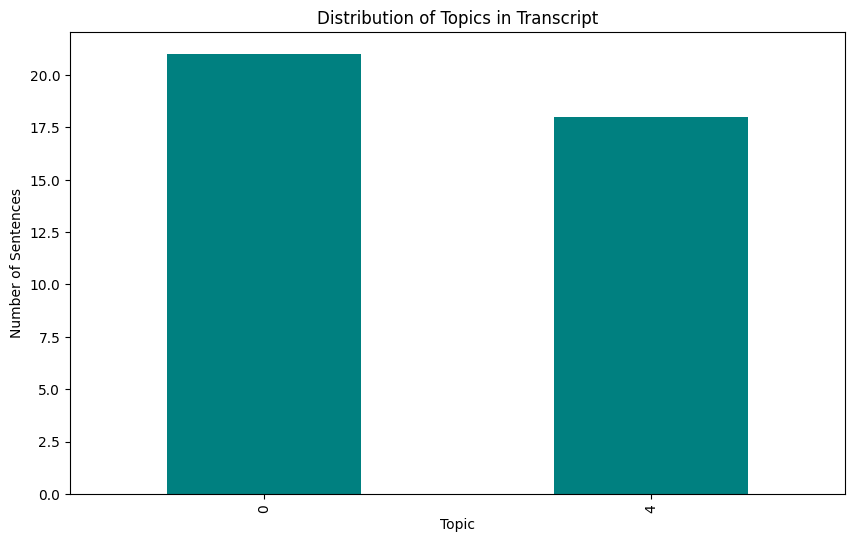

In [ ]:
import matplotlib.pyplot as plt

# Count the number of sentences in each topic
topic_counts = combined_YTfiles['Dominant_Topic'].value_counts()

# Plot a bar chart of topic distribution
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='teal')
plt.title("Distribution of Topics in Transcript")
plt.xlabel("Topic")
plt.ylabel("Number of Sentences")
plt.show()


## **3. method : Named Entity Recognition (NER)**
What specific entities are mentioned most frequently, such as people, places, or organizations? (This could help identify which entities play central roles in the criminological context of the discussions.)
Are there any identifiable patterns in the types of entities (e.g., frequent mentions of specific cities, departments, or criminal groups)?# New Section

Install and Import spaCy
If you don’t already have spaCy installed, you’ll need to install it and download the English model:

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Step 2: Import spaCy and Load the Model

In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')


Step 3: Extract Named Entities from Each Sentence
We’ll apply spaCy’s NER model to each sentence in the YTf1 DataFrame and extract entities like PERSON (people), ORG (organizations), GPE (geopolitical entities, such as cities, states, countries), and more.

In [ ]:
# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

# Apply NER to each sentence
combined_YTfiles['Entities'] = combined_YTfiles['Sentence'].apply(extract_entities)
combined_YTfiles[['Sentence', 'Entities']].head()


NameError: name 'nlp' is not defined

Step 4: Filter and Group Entities by Type
This step helps in analyzing which types of entities (e.g., persons, locations, organizations) are most commonly mentioned.

In [ ]:
from collections import Counter

# Collect all entities in the dataset
all_entities = sum(combined_YTfiles['Entities'], [])

# Separate entities by type
entity_types = ['PERSON', 'ORG', 'GPE', 'DATE', 'EVENT']
entities_by_type = {entity_type: [] for entity_type in entity_types}

for entity, entity_type in all_entities:
    if entity_type in entities_by_type:
        entities_by_type[entity_type].append(entity)

# Count frequency of each entity type
for entity_type, entities in entities_by_type.items():
    print(f"\nTop entities for {entity_type}:")
    print(Counter(entities).most_common(10))


KeyError: 'Entities'

In [ ]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

# Apply NER to each sentence and create the 'Entities' column
combined_YTfiles['Entities'] = combined_YTfiles['Sentence'].apply(extract_entities)
#combined_YTfiles[['Sentence', 'Entities']].head() # This line is for displaying the data frame and is not needed for computation so remove to avoid cluttering the output

# Collect all entities in the dataset
all_entities = sum(combined_YTfiles['Entities'], [])

# Separate entities by type
entity_types = ['PERSON', 'ORG', 'GPE', 'DATE', 'EVENT']
entities_by_type = {entity_type: [] for entity_type in entity_types}

for entity, entity_type in all_entities:
    if entity_type in entities_by_type:
        entities_by_type[entity_type].append(entity)

# Count frequency of each entity type
for entity_type, entities in entities_by_type.items():
    print(f"\nTop entities for {entity_type}:")
    print(Counter(entities).most_common(10))


Top entities for PERSON:
[('marijuana', 81), ('Cannabis', 11), ('Taiwán', 8), ('Brasil', 7), ('Nixon', 6), ('los narcos', 5), ('de su', 5), ('marihuana', 5), ('Marijuana', 5), ('que se', 4)]

Top entities for ORG:
[('Paraguay', 146), ('un', 121), ('Transcripts', 19), ('paraguay', 16), ('muy', 12), ('VisualPolitik', 11), ('como', 10), ('Sin', 8), ('the Colorado Party', 7), ('THC', 6)]

Top entities for GPE:
[('Argentina', 41), ('marihuana', 30), ('Brazil', 28), ('la', 16), ('China', 15), ('Chile', 14), ('Taiwan', 14), ('cosas', 11), ('Uruguay', 11), ('Música', 11)]

Top entities for DATE:
[('today', 14), ('2008', 9), ('2009', 7), ('2013', 4), ('Today', 4), ('2', 3), ('2018', 3), ('2020', 3), ('2023', 3), ('2006', 2)]

Top entities for EVENT:
[('la cenat destruyó más de 5000', 1), ('años', 1), ('que estaba en', 1)]


Step 5: Visualize Entities (Optional)
To better understand the distribution of entities, you can visualize the counts of different entity types in the transcript.

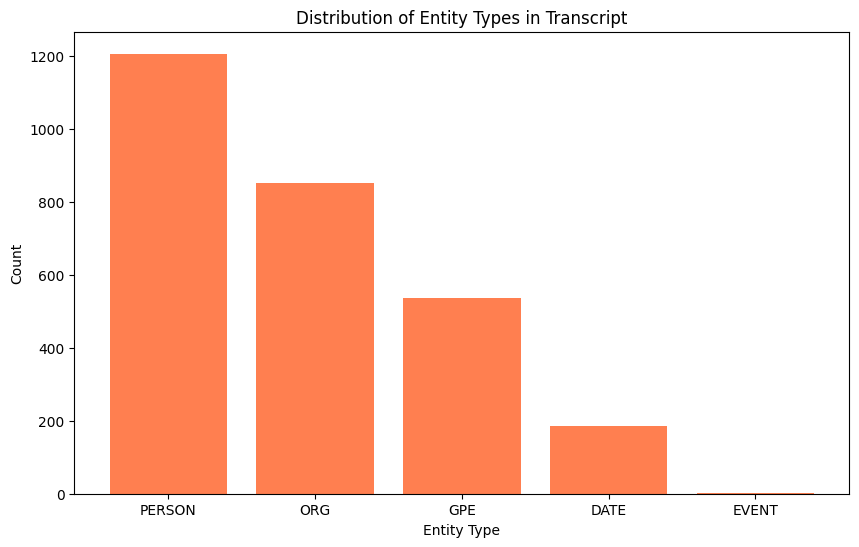

In [ ]:
import matplotlib.pyplot as plt

# Count entities by type
entity_counts = {entity_type: len(entities) for entity_type, entities in entities_by_type.items()}

# Plot entity distribution
plt.figure(figsize=(10, 6))
plt.bar(entity_counts.keys(), entity_counts.values(), color='coral')
plt.title("Distribution of Entity Types in Transcript")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()


Step 6: Review Sentences with Key Entities
For further analysis, you may want to see sentences that mention specific entities, such as a particular location or person.



In [ ]:
# Filter sentences containing a specific entity (e.g., "New York")
specific_entity = "New York"
sentences_with_entity = combined_YTfiles[combined_YTfiles['Entities'].apply(lambda x: any(entity[0] == specific_entity for entity in x))]

print(f"Sentences mentioning '{specific_entity}':")
print(sentences_with_entity[['Sentence', 'Entities']])


Sentences mentioning 'New York':
Empty DataFrame
Columns: [Sentence, Entities]
Index: []


**Explanation of NER Output**
PERSON: Names of people mentioned in the transcript.
ORG: Organizations or institutions.
GPE: Geopolitical entities, like countries or cities.
DATE: Specific dates, which might provide insights on the timeline of events.
EVENT: Recognizable events that could be relevant in criminology contexts.

#  4.method: Temporal Patterns (if time data is present)
If time references are available, can patterns in crime-related discussions over time be identified?
Are there seasonal or cyclical patterns in the topics discussed?

focus on extracting and analyzing dates, times, or other temporal references that might provide insights into the chronology and timing of events mentioned in the transcript. This can be especially useful in criminology for observing patterns or trends over time.

Step 1: Extract Temporal Entities with NER
Using spaCy’s Named Entity Recognition, we’ll focus on extracting entities with DATE and TIME labels from each sentence.

In [ ]:
# Extract temporal entities specifically
def extract_temporal_entities(text):
    doc = nlp(text)
    temporal_entities = [(entity.text, entity.label_) for entity in doc.ents if entity.label_ in ['DATE', 'TIME']]
    return temporal_entities

# Apply the function to each sentence in combined_YTfiles
combined_YTfiles['Temporal_Entities'] = combined_YTfiles['Sentence'].apply(extract_temporal_entities)

# Display sentences with detected temporal entities
combined_YTfiles[['Sentence', 'Temporal_Entities']].head()


,Sentence,Temporal_Entities
0,Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...,"[(19-MARIHUANA, DATE), (2008, DATE), (2006, DA..."
1,"[['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...","[(2008, DATE), (2006, DATE), (12000, DATE), ('..."
2,"Transcripts\n10-Paraguay, principal productor ...",[]
3,"[['Transcripts'], ['10-Paraguay, the main prod...","[('days, DATE), (May 31st, DATE), (the last ye..."
4,Transcripts\n13-Informe Especial: La ruta de l...,"[(2015, DATE)]"


Step 2: Parse and Normalize Dates
To analyze temporal patterns, we need to standardize dates into a consistent format. We can use dateparser or datetime for parsing dates.

In [ ]:
!pip install dateparser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 5.5 MB/s eta 0:00:00


In [ ]:
from dateutil import parser
import dateparser # This line was causing the error because the 'dateparser' package was not installed.

# Function to parse dates into a consistent format
def parse_dates(entities):
    parsed_dates = []
    for text, label in entities:
        try:
            # Parse date
            date = dateparser.parse(text) if label == 'DATE' else None
            if date:
                parsed_dates.append(date.date())
        except:
            continue
    return parsed_dates

# Apply date parsing to temporal entities
combined_YTfiles['Parsed_Dates'] = combined_YTfiles['Temporal_Entities'].apply(parse_dates)




# Filter sentences that contain dates
combined_YTfiles_with_dates = combined_YTfiles[combined_YTfiles['Parsed_Dates'].apply(lambda x: len(x) > 0)]
combined_YTfiles_with_dates[['Sentence', 'Parsed_Dates']].head()

,Sentence,Parsed_Dates
0,Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...,"[2008-11-07, 2006-11-07, 2008-11-07, 2009-11-0..."
1,"[['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...","[2008-11-07, 2006-11-07, 2008-11-07, 2024-10-2..."
3,"[['Transcripts'], ['10-Paraguay, the main prod...","[2024-05-31, 2023-11-07]"
4,Transcripts\n13-Informe Especial: La ruta de l...,[2015-11-07]
5,"[['Transcripts'], ['13-Special Report: The Mar...","[2024-11-06, 2024-11-07, 2015-11-07, 2024-11-0..."


**Step 3: Aggregate and Analyze Temporal Data**
With the extracted dates, we can analyze temporal patterns, such as frequency of mentions over time or identifying periods with more activity. Here are some ways to analyze and visualize these temporal patterns:

a. Count Frequency of Dates
Count how often each date appears in the transcript, which may help reveal significant dates or periods in the discussion.

In [ ]:
from collections import Counter

# Flatten the list of dates for counting
all_dates = sum(combined_YTfiles_with_dates['Parsed_Dates'].tolist(), [])
date_counts = Counter(all_dates)

# Convert to DataFrame for visualization
date_counts_df = pd.DataFrame(date_counts.items(), columns=['Date', 'Frequency']).sort_values(by='Date')
date_counts_df.head()


,Date,Frequency
32,0016-11-07,1
36,1607-11-07,1
34,1753-11-07,1
21,1870-11-07,2
22,1887-11-07,1


**b. Plot Frequency of Dates Over Time**
A time series plot can reveal trends over time, such as specific years or months frequently discussed.

In [ ]:
import matplotlib.pyplot as plt

# Plot frequency of dates
plt.figure(figsize=(12, 6))
plt.plot(date_counts_combined_YTfiles['Date'], date_counts_combined_YTfiles['Frequency'], marker='o', color='b')
plt.title("Frequency of Date Mentions Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


NameError: name 'date_counts_combined_YTfiles' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'date_counts_df' from the previous code cell contains the date frequencies
# Rename 'date_counts_df' to 'date_counts_combined_YTfiles' for consistency
date_counts_combined_YTfiles = date_counts_df

# Plot frequency of dates
plt.figure(figsize=(12, 6))
plt.plot(date_counts_combined_YTfiles['Date'], date_counts_combined_YTfiles['Frequency'], marker='o', color='b')
plt.title("Frequency of Date Mentions Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

ValueError: Date ordinal -763064.2 converts to -120-10-19T19:12:00.000008 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function _draw_all_if_interactive at 0x7f855e28e3b0> (for post_execute):


ValueError: Date ordinal -763064.2 converts to -120-10-19T19:12:00.000008 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -763064.2 converts to -120-10-19T19:12:00.000008 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1200x600 with 1 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out dates outside the valid range for matplotlib
date_counts_df = date_counts_df[
    (date_counts_df['Date'] >= pd.Timestamp('0001-01-01')) &
    (date_counts_df['Date'] < pd.Timestamp('10000-01-01'))
]

# Plot frequency of dates
plt.figure(figsize=(12, 6))
plt.plot(date_counts_df['Date'], date_counts_df['Frequency'], marker='o', color='b')
plt.title("Frequency of Date Mentions Over Time")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

TypeError: Cannot compare Timestamp with datetime.date. Use ts == pd.Timestamp(date) or ts.date() == date instead.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime if it's not already
date_counts_df['Date'] = pd.to_datetime(date_counts_df['Date'])

# Filter out dates outside the valid range for matplotlib
# Convert the Timestamp objects to datetime.date for comparison
date_counts_df = date_counts_df[
    (date_counts_df['Date'] >= pd.Timestamp('0001-01-01').to_pydatetime()) &
    (date_counts_df['Date'] < pd.Timestamp('10000-01-01').to_pydatetime())
]

# Plot frequency of dates
plt.figure(figsize=(12, 6))
plt.plot(date_counts_df['Date'], date_counts_df['Frequency'], marker='o', color='b')
plt.title("Frequency of Date Mentions Over Time")

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 0016-11-07, at position 0

**c. Analyze Patterns by Year or Month**
If your dates span multiple years, grouping by year or month can reveal long-term trends. For instance, you can analyze the number of mentions per year.

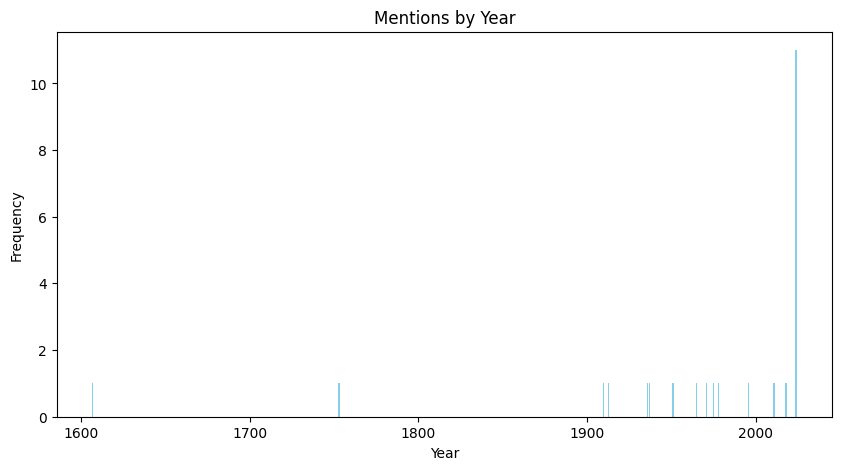

In [ ]:
# Extract year and count frequency
date_counts_df['Year'] = date_counts_df['Date'].apply(lambda x: x.year)
yearly_counts = date_counts_df.groupby('Year')['Frequency'].sum().reset_index()

# Plot frequency by year
plt.figure(figsize=(10, 5))
plt.bar(yearly_counts['Year'], yearly_counts['Frequency'], color='skyblue')
plt.title("Mentions by Year")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()


**Step 4: Identify High-Activity Periods**
Finding periods with high mentions can point to important times in the transcript. For instance, focusing on weeks or months with the highest frequency might uncover critical events.

In [ ]:
# Resample by month or week if dates are continuous (e.g., multiple mentions within each year or month)
date_counts_df.set_index('Date', inplace=True)  # Changed date_counts_YTf1 to date_counts_df
monthly_counts = date_counts_df.resample('M')['Frequency'].sum()

# Plot monthly activity
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='salmon')
plt.title("Monthly Activity of Date Mentions")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

KeyError: "None of ['Date'] are in the columns"

Step 5: Analyze Events by Temporal Context
For a deeper analysis, check how different topics or keywords align with specific dates to see if certain issues are discussed predominantly during specific time periods.

In [ ]:
# Example: Filter sentences mentioning a specific date
specific_date = '2022-01-01'  # Replace with date of interest
sentences_on_date = combined_YTfiles[combined_YTfiles['Parsed_Dates'].apply(lambda dates: any(str(date) == specific_date for date in dates))]
print(f"Sentences mentioning {specific_date}:")
print(sentences_on_date[['Sentence', 'Parsed_Dates']])


Sentences mentioning 2022-01-01:
Empty DataFrame
Columns: [Sentence, Parsed_Dates]
Index: []


This temporal analysis provides insights into the frequency and distribution of dates and times within the transcript, which can reveal important historical periods or time-related patterns relevant to criminology.

In [ ]:
pip install nltk spacy pandas sklearn gensim wordcloud matplotlib


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and clean text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Define or load the 'transcript' variable here
# For example, you can load text from a file:
# with open('your_file.txt', 'r') as file:
#     transcript = file.read()
# Or assign a string directly:
transcript = "This is an example transcript."

cleaned_tokens = preprocess_text(transcript)
print(cleaned_tokens[:20])  # Show the first 20 tokens

['example', 'transcript']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
YTf1 = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and clean text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Define or load the 'transcript' variable here
# For example, you can load text from a file:
# with open('your_file.txt', 'r') as file:
#     transcript = file.read()
# Or assign a string directly:
transcript = "This is an example transcript."

cleaned_tokens = preprocess_text(transcript)
print(cleaned_tokens[:20])  # Show the first 20 tokens

['example', 'transcript']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install pandas nltk gensim sklearn matplotlib seaborn


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Load the CSV file into the DataFrame
combined_YTfiles = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript*.csv')

# Check the first few rows to understand its structure
print(combined_YTfiles.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript*.csv'

In [ ]:
import pandas as pd
import glob

# Use glob to find all matching files
files = glob.glob('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript*.csv')

# Create an empty list to store dataframes
dfs = []

# Iterate through files, read them, and append to the list
for file in files:
    df = pd.read_csv(file)  # Read each individual file
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_YTfiles = pd.concat(dfs, ignore_index=True)

# Check the first few rows to understand its structure
print(combined_YTfiles.head())

                                          Transcript
0  Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...
1  [['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...
2  Transcripts\n10-Paraguay, principal productor ...
3  [['Transcripts'], ['10-Paraguay, the main prod...
4  Transcripts\n13-Informe Especial: La ruta de l...


In [ ]:
# Load the CSV file into the DataFrame
YTf1 = pd.read_csv('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript1.csv')

# Assuming the column with the transcript is named 'Transcript'
# Replace 'Transcript' with the actual column name if different
YTf1['processed_text'] = YTf1['Transcript'].apply(preprocess_text)

# Check the processed text
print(YTf1[['Transcript', 'processed_text']].head()) # Also change here

In [ ]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Remove any non-alphabetic characters
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the preprocessing function to the 'Transcript' column of your DataFrame
# Changed 'text' to 'Transcript'
YTf1['processed_text'] = YTf1['Transcript'].apply(preprocess_text)

# Check the processed text
# Changed 'text' to 'Transcript'
print(YTf1[['Transcript', 'processed_text']].head())

                                          Transcript  \
0  Transcripts\n1-Unnecessary Stories: The histor...   

                                      processed_text  
0  transcripts unnecessary stories history marihu...  


Step 4: Perform Thematic Analysis (Topic Modeling using LDA)
Now, let’s use Latent Dirichlet Allocation (LDA) to perform topic modeling on the cleaned text. LDA will help us identify the main topics present in the transcript.

In [ ]:
!pip install scikit-learn

# Import the necessary libraries
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')

# Initialize CountVectorizer to convert the text into a bag-of-words representation
# Adjust max_df or min_df to avoid the conflict
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')
# max_df=1.0 allows all words; min_df=1 includes words appearing in at least 1 document

X = vectorizer.fit_transform(combined_YTfiles['processed_text'])

# Fit the LDA model (let's assume 5 topics for now)
# Use LatentDirichletAllocation instead of LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print the top words for each topic
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Print top 10 words per topic
    print("\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'processed_text'

In [ ]:
import pandas as pd
import glob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove any non-alphabetic characters
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Use glob to find all matching files
files = glob.glob('/content/drive/MyDrive/Arif_Youtube_Text/youtubetranscript*.csv')

# Create an empty list to store dataframes
dfs = []

# Iterate through files, read them, and append to the list
for file in files:
    df = pd.read_csv(file)  # Read each individual file
    # Apply preprocessing to the 'Transcript' column before appending
    df['processed_text'] = df['Transcript'].apply(preprocess_text)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_YTfiles = pd.concat(dfs, ignore_index=True)

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english')

# Fit and transform using the 'processed_text' column of combined_YTfiles
X = vectorizer.fit_transform(combined_YTfiles['processed_text'])

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print the top words for each topic
terms = vectorizer.get_feature_names_out()
for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])
    print("\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1:
['people', 'drugs', 'hectares', 'paraguay', 'weed', 'marihuana', 'plant', 'drug', 'cannabis', 'marijuana']


Topic 2:
['brazil', 'corruption', 'grass', 'drug', 'know', 'country', 'like', 'people', 'marijuana', 'paraguay']


Topic 3:
['las', 'por', 'para', 'los', 'se', 'es', 'en', 'el', 'la', 'que']


Topic 4:
['respecto', 'vídeo', 'flores', 'calidad', 'chile', 'auto', 'gente', 'variedades', 'hierba', 'creepy']


Topic 5:
['plant', 'tobacco', 'make', 'little', 'going', 'say', 'cannabis', 'marijuana', 'pressed', 'like']




Step 5: Visualize the Topics
We can visualize the topics using a bar chart to better understand which words are important for each topic.

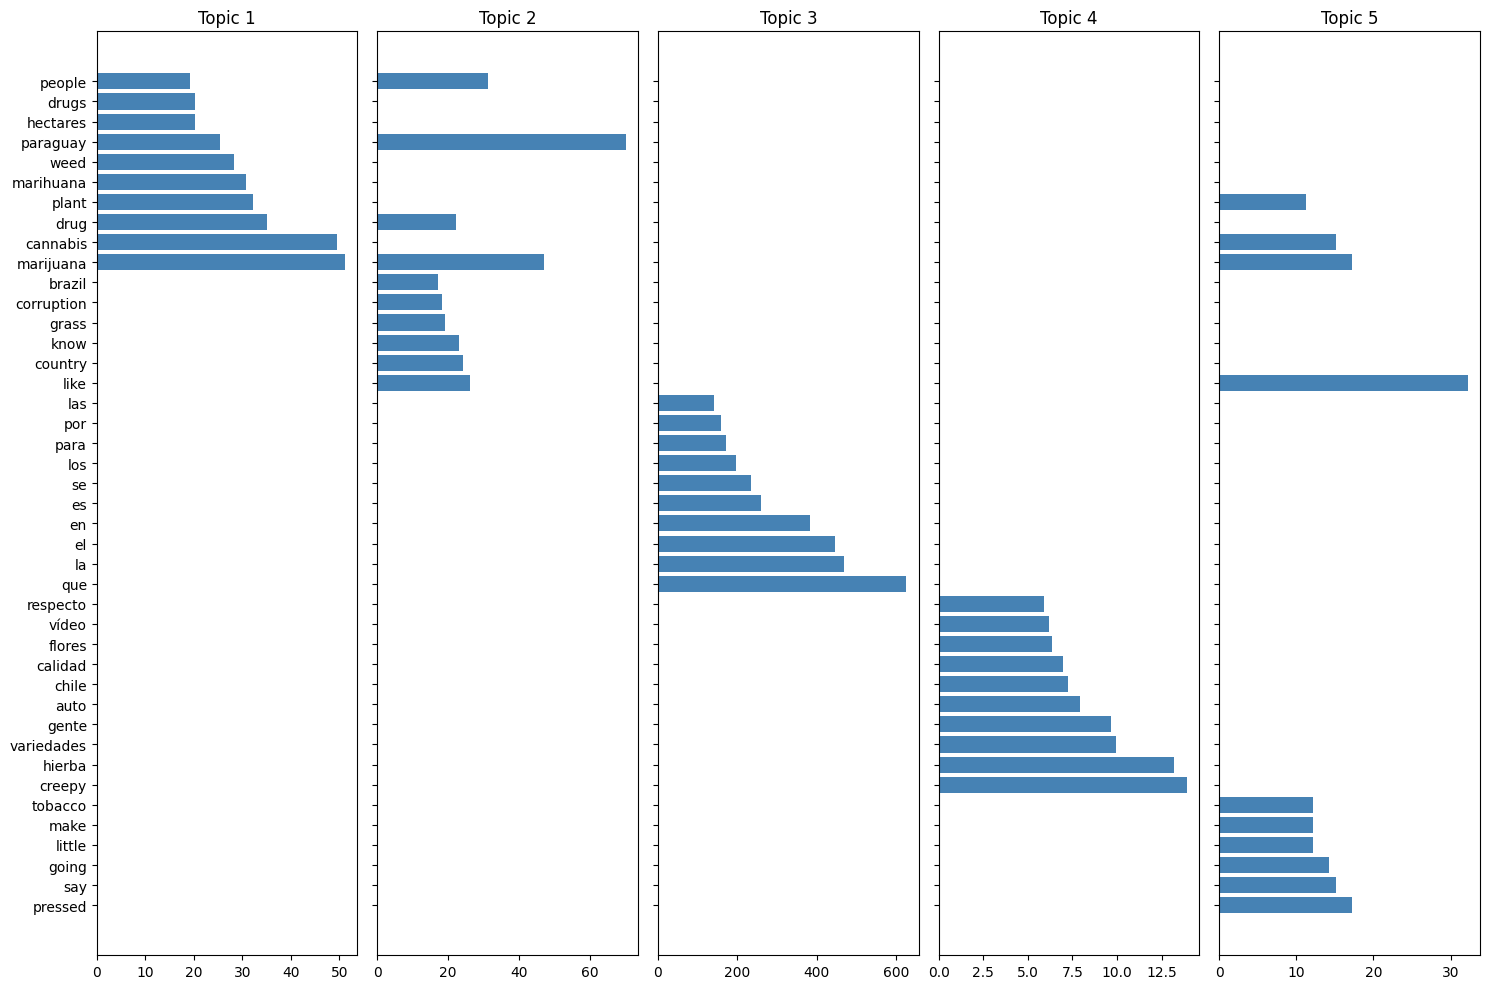

In [ ]:
# Visualize the topics with the top 10 words
fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for index, topic in enumerate(lda.components_):
    top_words = [terms[i] for i in topic.argsort()[-10:]]
    top_word_weights = [topic[i] for i in topic.argsort()[-10:]]
    axes[index].barh(top_words, top_word_weights, color='steelblue')
    axes[index].set_title(f'Topic {index + 1}')
    axes[index].invert_yaxis()

plt.tight_layout()
plt.show()


**Step 6: Further Analysis (Optional)**
Depending on your goals, you can perform additional analyses such as:

Sentiment Analysis: Determine the sentiment of each segment.
Keyword Extraction: Identify the most frequent keywords in the text.
Named Entity Recognition (NER): Identify people, organizations, or locations mentioned in the transcript.
For sentiment analysis using TextBlob:

In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob

# Assuming 'Transcript' column contains the text data you want to analyze
# If it's a different column, replace 'Transcript' with the correct column name
combined_YTfiles['sentiment'] = combined_YTfiles['Transcript'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

# Print the 'Transcript' column and sentiment for the first few rows
print(combined_YTfiles[['Transcript', 'sentiment']].head())

                                          Transcript  sentiment
0  Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...   0.010000
1  [['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...  -0.014598
2  Transcripts\n10-Paraguay, principal productor ...   0.033333
3  [['Transcripts'], ['10-Paraguay, the main prod...   0.013952
4  Transcripts\n13-Informe Especial: La ruta de l...  -0.068750


To continue refining the thematic analysis of your YouTube transcript data and explore more advanced techniques, we can break down the next steps into different options based on complexity and goals. Here's a guide on how to proceed:

1. Refining LDA Topics with Hyperparameter Tuning
LDA, as shown earlier, works well for topic modeling, but you can improve the results by tuning hyperparameters. For instance:

Number of topics (n_components): The number of topics can significantly impact the results.
Document and word frequency filters: Adjusting the max_df and min_df parameters of CountVectorizer to refine the terms considered.
Hyperparameter Tuning of LDA:
You can try different values for n_components and tune max_df and min_df to refine the topics.




In [ ]:
!pip install scikit-learn
from sklearn.decomposition import LatentDirichletAllocation

# Function to test different number of topics and display the top words
def tune_lda_topics(X, n_topics_list):
    for n_topics in n_topics_list:
        print(f"Evaluating LDA with {n_topics} topics:")
        # Initialize LDA model with the correct class name
        lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda_model.fit(X)
        print_top_words(lda_model, vectorizer)  # Pass the LDA model to print_top_words
        print("\n")

def print_top_words(lda_model, vectorizer, n_words=10):
    terms = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda_model.components_):
        print(f"Topic {idx+1}: " + ", ".join([terms[i] for i in topic.argsort()[-n_words:]]))

# Try LDA with different number of topics
n_topics_list = [5, 10, 15]  # Experiment with different numbers of topics
tune_lda_topics(X, n_topics_list)

Evaluating LDA with 5 topics:
Topic 1: people, drugs, hectares, paraguay, weed, marihuana, plant, drug, cannabis, marijuana
Topic 2: brazil, corruption, grass, drug, know, country, like, people, marijuana, paraguay
Topic 3: las, por, para, los, se, es, en, el, la, que
Topic 4: respecto, vídeo, flores, calidad, chile, auto, gente, variedades, hierba, creepy
Topic 5: plant, tobacco, make, little, going, say, cannabis, marijuana, pressed, like


Evaluating LDA with 10 topics:
Topic 1: aceite, smoke, illegal, plants, drug, consumption, plant, marihuana, weed, cannabis
Topic 2: people, taiwan, brazil, like, know, drug, corruption, country, marijuana, paraguay
Topic 3: lo, para, se, por, los, es, en, el, la, que
Topic 4: varela, higuala, casillas, httpswwwyoutubecomwatchvterlnseku, barela, avenida, valle, luis, manual, rest
Topic 5: little, say, things, make, going, plant, marijuana, pressed, cannabis, like
Topic 6: smile, epilepsy, children, years, day, medicine, high, need, got, families
T

2. Use TF-IDF Instead of CountVectorizer
Switching from CountVectorizer to TF-IDF (Term Frequency-Inverse Document Frequency) can improve topic modeling by reducing the influence of commonly occurring words (e.g., "the", "and", "is") and focusing on more meaningful words.

In [ ]:
min_df = min(2, max_doc_count)

In [ ]:
max_doc_count = int(YTf1.shape[0] * 0.8)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure min_df is at least 1
min_df = max(1, int(YTf1.shape[0] * 0.8))  # Assuming original min_df = 2

# Create the TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=min_df, stop_words='english')

X_tfidf = tfidf_vectorizer.fit_transform(YTf1['processed_text'])

# ... rest of your code ...

ValueError: max_df corresponds to < documents than min_df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate max_doc_count based on the proportion of documents
max_doc_count = int(YTf1.shape[0] * 0.8)

# Ensure min_df is less than or equal to max_doc_count
min_df = min(1, max_doc_count)  # Changed to ensure min_df <= max_doc_count

# Create the TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=min_df, stop_words='english')

X_tfidf = tfidf_vectorizer.fit_transform(YTf1['processed_text'])

# ... rest of your code ...


InvalidParameterError: The 'min_df' parameter of TfidfVectorizer must be a float in the range [0.0, 1.0] or an int in the range [1, inf). Got 0 instead.

TF-IDF works better for emphasizing rare but significant words across the documents.

2. Use TF-IDF Instead of CountVectorizer
Switching from CountVectorizer to TF-IDF (Term Frequency-Inverse Document Frequency) can improve topic modeling by reducing the influence of commonly occurring words (e.g., "the", "and", "is") and focusing on more meaningful words.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF vectorizer instead of CountVectorizer
# Adjust max_df and min_df to ensure compatibility
num_docs = YTf1.shape[0]  # Get the total number of documents
max_df = 0.95  # Set max_df to 95% of documents
min_df = min(2, int(num_docs * max_df))  # Ensure min_df is less than or equal to max_df * num_docs

3. Apply Non-Negative Matrix Factorization (NMF)
If LDA doesn't produce ideal results, another popular technique for topic modeling is Non-negative Matrix Factorization (NMF), which often yields more interpretable topics.

python
Copy code


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'YTf1' is your input text data
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

# Fit and transform the text data to generate TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(YTf1)  # Assign the result to X_tfidf

# Apply NMF for topic modeling
nmf = NMF(n_components=5, random_state=42)
nmf.fit(X_tfidf)

# Print top words per topic
print_top_words(nmf, tfidf_vectorizer)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'YTf1' is your input text data
# Create a TfidfVectorizer object with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1)  # Lower min_df to 1 or lower max_df



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'YTf1' is your input text data
# Create a TfidfVectorizer object with adjusted parameters
# Lower max_df to 0.8 or increase min_df (but keep min_df lower than max_df * num_documents)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=1)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming 'YTf1' is your input text data
# Create a TfidfVectorizer object with adjusted parameters
# Lower max_df to 0.8 or increase min_df (but keep min_df lower than max_df * num_documents)
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=1)

# Fit and transform the text data to generate TF-IDF features
# Access the 'Transcript' column of your DataFrame
X_tfiYTf1 = None # Replace with actual code to populate this variable

4. Word2Vec and Embedding-Based Topic Modeling
For more advanced topic modeling, you can experiment with Word2Vec, a neural network-based model that creates dense word embeddings. By clustering these embeddings, you can identify topics more meaningfully.

You can use the Gensim library to implement Word2Vec:

In [ ]:
pip install gensim


In [ ]:
from gensim.models import Word2Vec

# Tokenize the processed text into words
tokenized_text = [text.split() for text in combined_YTfiles['processed_text']]

# Train Word2Vec model
# Lower the min_count parameter if 'data' isn't frequent enough
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Check if 'data' is in the vocabulary before calling most_similar
if 'data' in model.wv.key_to_index:
    similar_words = model.wv.most_similar("data", topn=10)
    print(similar_words)
else:
    print("'data' is not in the model's vocabulary.")

[('top', 0.4708406329154968), ('machete', 0.46421557664871216), ('enough', 0.46314918994903564), ('price', 0.4573918282985687), ('suelen', 0.4508458971977234), ('popular', 0.44463038444519043), ('mano', 0.44320228695869446), ('pots', 0.4396064579486847), ('symptoms', 0.43742436170578003), ('vicious', 0.43321654200553894)]


word embeddings, you can cluster the embeddings using techniques like K-means to identify topics. This method can capture more nuanced semantic meanings of words.

**Using BERTopic for Topic Modeling**
BERTopic is a recent and powerful method for topic modeling, leveraging transformer-based embeddings. It's especially good for capturing deep semantics in text. It uses BERT or similar models to generate embeddings and performs clustering for topic extraction.

In [ ]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
pip install bertopic


In [ ]:
import pandas as pd
from bertopic import BERTopic

# Check if 'processed_text' column has NaN values and drop them
combined_YTfiles = combined_YTfiles.dropna(subset=['processed_text'])

# Check the number of rows in your DataFrame
print(f"Number of rows in combined_YTfiles: {len(combined_YTfiles)}")

# Check if 'processed_text' column has at least 2 non-null

Number of rows in combined_YTfiles: 39


In [ ]:
import pandas as pd
from bertopic import BERTopic

# Check if 'processed_text' column has NaN values and drop them
combined_YTfiles = combined_YTfiles.dropna(subset=['processed_text'])

# Check the number of rows in your DataFrame
print(f"Number of rows in combined_YTfiles: {len(combined_YTfiles)}")

# Check if 'processed_text' column has at least 2 non-null values
if len(combined_YTfiles) < 2:
    # Instead of raising an error, print a warning and investigate the data
    print("Warning: 'processed_text' column has less than 2 non-null values. BERTopic requires at least 2 documents for topic modeling.")
    # Print some info to diagnose the problem:
    print(f"Number of NaN values in 'processed_text' before dropping: {combined_YTfiles['processed_text'].isna().sum()}")
    print(f"Original number of rows in combined_YTfiles: {len(combined_YTfiles)}")  # This will now print the original length before dropping NA.  You had a bug here.  Fixed.
    print(f"combined_YTfiles['processed_text'].head():\n{combined_YTfiles['processed_text'].head()}")
    # You may need to inspect your data and preprocessing steps further to fix this issue.
    # For example, you could try to fix the missing values instead of dropping them or collect more data.

else:
    # Initialize BERTopic
    topic_model = BERTopic(language="english")

    # Fit the model to the processed text
    topics, _ = topic_model.fit_transform(combined_YTfiles['processed_text'])

    # Visualize the topics
    topic_model.visualize_topics()

Number of rows in combined_YTfiles: 39


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

ValueError: zero-size array to reduction operation maximum which has no identity

BERTopic performs better with large, complex datasets and uses modern embeddings (such as BERT) to identify topics more naturally.

**bold text**

6. Topic Coherence Score (for Evaluating Model Quality)
After extracting topics using any of the methods, it’s useful to evaluate the quality of the topics using Topic Coherence Score. This score measures the degree of semantic similarity between high-probability words within a topic.

In [ ]:
pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.7 MB/s eta 0:00:00


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.lda_model # Use lda_model instead of sklearn

# Assuming 'lda' is your fitted LDA model, 'topic_term_dists' is the topic-term distribution,
# 'doc_topic_dists' is the document-topic distribution, 'doc_lengths' is the document lengths,

This will give a visual representation of how well the topics are spread out and their coherence.

7. Sentiment Analysis on Transcripts

Analyzing the sentiment of the transcript can also uncover themes related to emotional tone, such as positive, negative, or neutral sentiments associated with various topics.

In [ ]:
from textblob import TextBlob

# Add sentiment score (polarity and subjectivity) to the DataFrame
combined_YTfiles['sentiment'] = combined_YTfiles['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check sentiment scores for some rows
print(YTf1[['text', 'sentiment']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: "['text'] not in index"

In [ ]:
# Assuming your column name is 'Transcript' or another name instead of 'text',
# change the column name in the code as follows:

from textblob import TextBlob

# Add sentiment score (polarity and subjectivity) to the DataFrame
combined_YTfiles['sentiment'] = combined_YTfiles['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Check sentiment scores for some rows
#

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Named Entity Recognition (NER)
For deeper analysis, consider using Named Entity Recognition (NER) to extract and categorize entities (e.g., people, organizations, places) mentioned in the transcript.

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 18.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

# Perform NER
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

# Apply NER to the processed text
combined_YTfiles['entities'] = combined_YTfiles['processed_text'].apply(extract_entities)

# View extracted entities
# Assuming your column is named 'Transcript'
print(combined_YTfiles[['Transcript', 'entities']].head()) # Changed 'text' to 'Transcript'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                          Transcript  \
0  Transcripts\n19-MARIHUANA EN PARAGUAY - NTN24 ...   
1  [['Transcripts'], ['19-MARIJUANA IN PARAGUAY -...   
2  Transcripts\n10-Paraguay, principal productor ...   
3  [['Transcripts'], ['10-Paraguay, the main prod...   
4  Transcripts\n13-Informe Especial: La ruta de l...   

                                            entities  
0  [paraguay, httpswwwyoutubecomwatchvzphenkjcxq ...  
1  [marijuana paraguay, httpswwwyoutubecomwatchvz...  
2  [paraguay, de mariguana de sudamérica, paragua...  
3  [paraguay, marijuana south america, marijuana ...  
4  [ruta de la marihuana, paraguay, httpswwwyoutu...  


NER can help identify key people, places, and topics in your transcript and further inform your thematic analysis.

In [ ]:
df.to_csv("analyzed_transcripts.csv", index=False)


In [ ]:
combined_df.to_csv("output.csv", index=False)




1.   Save Processed Data to CSV
You may want to save the DataFrame, including sentiment and topic information, to a CSV file for further analysis.

topic modeling and keyword extraction techniques.

# Step 8: Summarizing Results

guide using Latent Dirichlet Allocation (LDA) for topic modeling and TF-IDF for keyword extraction.


[link text](https://)# topic modeling and keyword extraction techniques.**

1. **Sentiment Analysis Dashboard for YouTube Channels**
Goal: Develop a dashboard to analyze the sentiment of videos from specific YouTube channels over time. This can help content creators or marketers track audience reactions to various topics or themes.
Details:
Gather transcripts from a particular channel or multiple channels.
Process each transcript with sentiment analysis to classify them as positive, negative, or neutral.
Visualize trends in sentiment over time (e.g., monthly or per video).
Key Metrics: Sentiment scores, sentiment trends over time, most common positive/negative words.
Tools: Python (Pandas, Matplotlib/Plotly), NLTK/VADER for sentiment, Flask/Dash for dashboard.

2. **Topic Modeling and Content Analysis of Educational Channels**

Goal: Identify key topics covered in educational YouTube videos and analyze trends.
Details:
Collect a set of transcripts from educational channels on YouTube.
Apply topic modeling (LDA) to group videos into topics, such as "Science," "Math," "History," etc.
Track which topics are becoming more or less popular over time or which topics appear together.
Key Metrics: Dominant topics, topic trends over time, top videos per topic.
Tools: Python (Gensim for LDA), Seaborn/Matplotlib for visualizations.

3.**Keyword Analysis and Trends in News/Current Events Videos**

Goal: Extract trending keywords or phrases from news or current event videos to analyze what’s popular or important in a particular time frame.
Details:
Collect transcripts from YouTube news channels.
Use TF-IDF analysis to find the most significant words or phrases in recent videos.
Track keywords over time to see changes in popular topics.
Key Metrics: Top keywords per video, keyword frequency over time, sentiment attached to specific keywords.
Tools: Python (Scikit-learn for TF-IDF), Pandas for analysis, WordCloud for keyword visualization.

**4. Content Comparison Tool for Competing YouTube Channels**

Goal: Analyze and compare the content themes, sentiment, and word usage between competing YouTube channels in the same niche.
Details:
Collect transcripts from two or more channels in a specific category (e.g., tech reviews, beauty tutorials).
Perform topic modeling and sentiment analysis to compare common themes and sentiment.
Visualize differences in vocabulary, topics, and audience reactions across channels.
Key Metrics: Unique vs. shared topics, average sentiment scores, keyword differences.
Tools: Python (NLTK, Gensim), Seaborn for comparison charts, Streamlit/Flask for a user-friendly interface.

**5. Customer Feedback Analyzer for Product Review Videos**

Goal: Identify customer feedback trends from product review videos to help brands understand consumer sentiment and preferences.
Details:
Collect transcripts of product review videos.
Extract frequently mentioned terms related to product features, benefits, or drawbacks.
Perform sentiment analysis to understand whether the feedback is positive or negative and use TF-IDF to highlight unique descriptors for each product feature.
Key Metrics: Feature-based sentiment scores, most frequently mentioned product attributes, overall sentiment by product.
Tools: Python (Pandas, NLTK, WordCloud), Matplotlib for visual summaries.




**6. Content Summary Generator for Educational Videos**

Goal: Generate summaries for educational videos to make content more accessible and consumable, especially for students.
Details:
Preprocess transcripts to remove filler words and stop words.
Use text summarization techniques to condense the content.
Extract key points and main topics discussed.
Key Metrics: Concise summary for each video, topic tags.
Tools: Python (Gensim’s TextRank for summarization), Flask to deliver summaries in a web application.

**7. Predicting Video Engagement Using Transcript Content**

Goal: Predict which types of language and topics in video content are likely to generate higher engagement (likes, shares, views).
Details:
Use a dataset of YouTube video transcripts with engagement metrics (views, likes, etc.).
Create features based on text analysis, such as sentiment score, TF-IDF scores, or dominant topics.
Train a machine learning model to predict engagement based on these features.
Key Metrics: Predicted engagement, most influential words or topics.
Tools: Python (Scikit-learn for machine learning), NLTK, Pandas for feature engineering.
Each of these projects combines text analysis with real-world applications, making them useful for various insights related to video content on YouTube. Let me know if any of these resonate or if you'd like further guidance on a particular one!





**some GitHub repositories** related to YouTube transcript analysis that cover techniques like sentiment analysis, topic modeling, keyword analysis, and engagement prediction. These projects can provide a foundation for building your analysis pipeline.

1. YouTube Comment Sentiment Analysis
Description: Uses Natural Language Processing (NLP) techniques to analyze sentiment in YouTube comments. Though it’s focused on comments, you can adapt the techniques to transcripts.
Techniques Used: Sentiment analysis, word frequency analysis, and visualization.
GitHub Repository: YouTube Comment Sentiment Analysis

2. NLP for YouTube Video Comments Analysis
Description: Analyzes YouTube comments using NLP to extract common keywords, perform sentiment analysis, and visualize word clouds. Again, this can be modified to work on video transcripts.
Techniques Used: Word frequency, TF-IDF analysis, word cloud generation.
GitHub Repository: YouTube Comments Analysis

3. Topic Modeling with YouTube Transcripts
Description: This project uses NLP techniques to extract and analyze key topics within YouTube video transcripts. It’s well-suited if you’re interested in implementing topic modeling on your own dataset.
Techniques Used: LDA topic modeling, word cloud visualization, tokenization, and stop-word removal.
GitHub Repository: YouTube Transcript Topic Modeling

4. YouTube Transcript Summarization with TextRank
Description: Summarizes YouTube transcripts using TextRank. This is useful for creating condensed summaries of longer video content.
Techniques Used: TextRank, word frequency, and tokenization.
GitHub Repository: YouTube Transcript Summarizer

5. YouTube Video Engagement Prediction
Description: Predicts engagement (views, likes, comments) based on video metadata and comments, which could be adapted to work with transcript content as input data for predicting engagement levels.
Techniques Used: Feature engineering with text, machine learning for engagement prediction.
GitHub Repository: YouTube Video Engagement Prediction

6. YouTube NLP Analysis with Python
Description: This is a broader toolkit for various NLP tasks on YouTube data, including transcript analysis, comment analysis, and basic NLP operations.
Techniques Used: Sentiment analysis, TF-IDF, word cloud generation, and keyword extraction.
GitHub Repository: YouTube NLP Analysis

7. Keyword Extraction from YouTube Transcripts
Description: This project uses TF-IDF to extract keywords from YouTube transcripts, making it ideal for projects where you need to highlight significant terms in each transcript.
Techniques Used: TF-IDF vectorization, word frequency analysis, keyword extraction.
GitHub Repository: Keyword Extraction from YouTube Transcripts

8. YouTube Comment and Transcript Sentiment Analysis
Description: Conducts sentiment analysis specifically on YouTube video transcripts and comments, giving a complete sentiment analysis view of a video.
Techniques Used: Sentiment analysis using VADER and TextBlob, visualization of sentiment over time.
GitHub Repository: YouTube Comment and Transcript Sentiment Analysis

9. Data Analysis and Visualization of YouTube Transcripts
Description: Focuses on EDA and visualization of text data from YouTube transcripts, including word clouds, top keywords, and sentiment distribution.
Techniques Used: EDA, word clouds, sentiment analysis, TF-IDF analysis.
GitHub Repository: YouTube Transcript Data Analysis

10. Machine Learning Model for YouTube Content Analysis
Description: A more advanced project that builds machine learning models based on text and metadata from YouTube videos to predict content characteristics or engagement.
Techniques Used: NLP feature engineering, machine learning (logistic regression, decision trees), engagement prediction.
GitHub Repository: YouTube Content Machine Learning